In [1]:
# %pip install CoolProp
# %pip install seaborn
# %pip install openpyxl


In [2]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn
import pickle

import DiadFit as pf
pf.__version__


'1.0.1'

In [3]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [4]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +slash+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +slash+'Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

In [5]:

## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)

def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

In [6]:
KD24= compile_Raman_sessions(path=os.getcwd(),sheet_name='Sheet1',keyword='Raman_session')

KD24 = KD24[(~KD24['filename'].str.contains('test'))&(KD24['Density g/cm3']>0)&~(KD24['σ Density g/cm3']>0.04)]

KD24['date_object']=pd.to_datetime(KD24['date'])

KD24=KD24.sort_values(by=['date_object', 'filename'])

KD24.to_clipboard(excel=True, index=False)

KD24.to_excel(compilation_folder+'/'+"KD24-628_Raman_allreps.xlsx")

KD24

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values,date_object
0,FG04-A1-4-start_r1,0.686361,0.004383,0.003674,0.002390,104.319185,0.007227,0.000536,0.007223,6.005,...,NaN,NaN,NaN,NaN,NaN,31415.0,0.997833,0.997828,0.997838,2025-01-17
1,FG04-A1-4-start_r2,0.686856,0.003134,0.002027,0.002390,104.320159,0.003986,0.000535,0.003958,5.969,...,NaN,NaN,NaN,NaN,NaN,31697.0,0.997832,0.997827,0.997837,2025-01-17
2,FG04-A1-4-start_r3,0.692817,0.005310,0.004741,0.002391,104.331862,0.009296,0.000531,0.009301,6.031,...,NaN,NaN,NaN,NaN,NaN,32662.0,0.997827,0.997822,0.997832,2025-01-17
3,KD24_c001_a1_FIA_r1,0.095926,0.010491,0.009778,0.003803,102.992346,0.024676,0.000516,0.024725,9.937,...,NaN,NaN,NaN,0.044998,0.019072,34629.0,0.997819,0.997814,0.997824,2025-01-17
4,KD24_c001_a1_FIA_r2,0.084617,0.006800,0.005639,0.003801,102.963805,0.014230,0.000515,0.014252,9.908,...,NaN,NaN,NaN,0.081166,0.033882,35018.0,0.997817,0.997812,0.997822,2025-01-17
5,KD24_c001_a1_FIA_r3,0.079439,0.005222,0.003578,0.003803,102.950737,0.009031,0.000514,0.009036,9.891,...,NaN,NaN,NaN,0.051154,0.021624,35265.0,0.997817,0.997812,0.997821,2025-01-17
6,KD24_c001_a1_FIB,0.062668,0.006605,0.005391,0.003817,102.908411,0.013605,0.000513,0.013625,9.855,...,NaN,NaN,NaN,NaN,NaN,35603.0,0.997815,0.997810,0.997820,2025-01-17
7,KD24_c001_a1_FIC,0.101646,0.009129,0.008297,0.003806,103.006781,0.020940,0.000509,0.020980,9.836,...,NaN,NaN,NaN,0.330160,0.124845,37487.0,0.997809,0.997805,0.997814,2025-01-17
8,KD24_c002_a1_FIA,0.095798,0.004789,0.002912,0.003803,102.992023,0.007348,0.000507,0.007347,9.848,...,NaN,NaN,NaN,0.045682,0.019356,38256.0,0.997807,0.997802,0.997812,2025-01-17
9,KD24_c003_a1_FIA,0.104360,0.004583,0.002549,0.003808,103.013631,0.006434,0.000506,0.006428,9.860,...,NaN,NaN,NaN,0.080759,0.033717,39058.0,0.997805,0.997801,0.997810,2025-01-17


# Now merge in the helper frame with the new naming convention and clean name tags

In [7]:
rep_FI_names=pd.read_excel('Helperfile_KD24.xlsx',sheet_name='Sheet1')
KD24_reps = pd.merge(KD24, rep_FI_names, on=['filename', 'date_object'])
KD24_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,date_object,Type,Mount,Sample,Crystal,Region,FI#,Sample_crystal,Sample_crystal_region,FI_name
0,FG04-A1-4-start_r1,0.686376,0.004382,0.003673,0.002390,104.319215,0.007224,0.000492,0.007223,6.005,...,2025-01-17,Std,NaN,FG04,A1,NaN,4,FG04_A1,FG04_A1,FG04-A1-4-start-45674
1,FG04-A1-4-start_r2,0.686899,0.003132,0.002024,0.002390,104.320244,0.003980,0.000490,0.003958,5.969,...,2025-01-17,Std,NaN,FG04,A1,NaN,4,FG04_A1,FG04_A1,FG04-A1-4-start-45674
2,FG04-A1-4-start_r3,0.692933,0.005310,0.004741,0.002391,104.332091,0.009293,0.000485,0.009301,6.031,...,2025-01-17,Std,NaN,FG04,A1,NaN,4,FG04_A1,FG04_A1,FG04-A1-4-start-45674
3,KD24_c001_a1_FIA_r1,0.096065,0.010491,0.009777,0.003803,102.992697,0.024675,0.000470,0.024725,9.937,...,2025-01-17,Sample,NaN,KD24,c001,a1,FIA,KD24_c001,KD24_c001_a1,KD24_c001_a1_FIA
4,KD24_c001_a1_FIA_r2,0.084757,0.006800,0.005638,0.003801,102.964158,0.014229,0.000469,0.014252,9.908,...,2025-01-17,Sample,NaN,KD24,c001,a1,FIA,KD24_c001,KD24_c001_a1,KD24_c001_a1_FIA
5,KD24_c001_a1_FIA_r3,0.079578,0.005221,0.003577,0.003803,102.951089,0.009028,0.000468,0.009036,9.891,...,2025-01-17,Sample,NaN,KD24,c001,a1,FIA,KD24_c001,KD24_c001_a1,KD24_c001_a1_FIA
6,KD24_c001_a1_FIB,0.062805,0.006605,0.005390,0.003817,102.908757,0.013603,0.000467,0.013625,9.855,...,2025-01-17,Sample,NaN,KD24,c001,a1,FIB,KD24_c001,KD24_c001_a1,KD24_c001_a1_FIB
7,KD24_c001_a1_FIC,0.101743,0.009128,0.008297,0.003806,103.007026,0.020939,0.000464,0.020980,9.836,...,2025-01-17,Sample,NaN,KD24,c001,a1,FIC,KD24_c001,KD24_c001_a1,KD24_c001_a1_FIC
8,KD24_c002_a1_FIA,0.095869,0.004789,0.002911,0.003803,102.992202,0.007345,0.000464,0.007347,9.848,...,2025-01-17,Sample,NaN,KD24,c002,a1,FIA,KD24_c002,KD24_c002_a1,KD24_c002_a1_FIA
9,KD24_c003_a1_FIA,0.104400,0.004582,0.002548,0.003808,103.013733,0.006431,0.000464,0.006428,9.860,...,2025-01-17,Sample,NaN,KD24,c003,a1,FIA,KD24_c003,KD24_c003_a1,KD24_c003_a1_FIA


## Means of reps of my data

In [8]:
grouped = KD24_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = KD24_reps.select_dtypes(include='number')
non_numeric_cols = KD24_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_KD24_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_KD24_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_KD24_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate KD24_averageds and reindex columns to the original order
KD24_averaged = pd.concat([numeric_KD24_averaged_mean, non_numeric_KD24_averaged], axis=1)
KD24_averaged = KD24_averaged.reindex(columns=KD24_reps.columns)

# Add standard deviation columns after reindexing
KD24_averaged = pd.concat([KD24_averaged, numeric_KD24_averaged_std.add_suffix('_Raman_STD')], axis=1)

# Reset index to get a DataFrame
KD24_averaged = KD24_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
KD24_averaged = pd.merge(KD24_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
KD24_averaged['averaged?'] = KD24_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
KD24_averaged=KD24_averaged[~(KD24_averaged['filename'].str.contains("186-9-118-A"))]
KD24_averaged.to_excel(compilation_folder+'/'+"KD24_averaged.xlsx")

KD24_averaged


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_SO2_Raman_STD,Peak_Height_SO2_Raman_STD,SO2_Diad_Ratio_Raman_STD,SO2_mol_ratio_Raman_STD,time_Raman_STD,preferred_values_Raman_STD,lower_values_Raman_STD,upper_values_Raman_STD,Mount_Raman_STD,averaged?
0,FG04-A1-4-start_r1,0.688736,0.004274,0.003479,0.002390,104.323850,0.006833,0.000489,0.006827,6.001667,...,NaN,NaN,NaN,NaN,653.931444,0.000002,0.000002,0.000002,NaN,Yes
1,KD24_c001_a1_FIA_r1,0.086800,0.007504,0.006331,0.003802,102.969315,0.015977,0.000469,0.016004,9.912000,...,25.970279,5.742007,0.019351,0.007917,320.631148,0.000001,0.000001,0.000001,NaN,Yes
2,KD24_c001_a1_FIB,0.062805,0.006605,0.005390,0.003817,102.908757,0.013603,0.000467,0.013625,9.855000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,KD24_c001_a1_FIC,0.101743,0.009128,0.008297,0.003806,103.007026,0.020939,0.000464,0.020980,9.836000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,KD24_c002_a1_FIA,0.095869,0.004789,0.002911,0.003803,102.992202,0.007345,0.000464,0.007347,9.848000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5,KD24_c003_a1_FIA,0.104400,0.004582,0.002548,0.003808,103.013733,0.006431,0.000464,0.006428,9.860000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6,KD24_c003_a1_FIB,0.095497,0.004504,0.002414,0.003803,102.991263,0.006093,0.000464,0.006089,9.859000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7,KD24_c003_a1_FIC,0.108004,0.005762,0.004321,0.003812,103.022827,0.010904,0.000465,0.010918,9.858000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8,KD24_c003_a2_FID,0.118878,0.004830,0.002948,0.003826,103.050269,0.007440,0.000466,0.007442,9.891000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
9,KD24_c003_a2_FIE,0.099888,0.004460,0.002327,0.003805,103.002346,0.005872,0.000466,0.005866,9.880000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


## Calculate SO2 mol % and temperature and Fo
- (NOTE: For now we will calculate using 1240 temperature (based on previous Kil average from simulatin and MIFI paper) )

In [9]:
KD24_averaged['SO2 mol%']=pf.calculate_mole_fraction_2comp(peak_area_a=KD24_averaged['Peak_Area_SO2'], peak_area_b=KD24_averaged['Diad1_Voigt_Area']+KD24_averaged['Diad2_Voigt_Area'],
                                  cross_section_a=5.3, cross_section_b=1.4+0.89, instrument_eff_a=1, instrument_eff_b=1)['% A']


# KD24_averaged['Fo']=(KD24_averaged['MgO']/40.3044)/((KD24_averaged['MgO']/40.3044)+(KD24_averaged['FeOt']/71.844))
KD24_averaged['Temp']=1240

## Now calculate first approx pressure pure CO2

In [13]:
P_SW96=pf.calculate_P_for_rho_T(CO2_dens_gcm3=KD24_averaged['Density g/cm3'], 
                                T_K=KD24_averaged['Temp']+273.15, EOS='SW96')
P_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,3.929890,392.988986,1513.15,0.688736
1,0.263493,26.349290,1513.15,0.086800
2,0.187412,18.741178,1513.15,0.062805
3,0.312237,31.223662,1513.15,0.101743
4,0.292948,29.294751,1513.15,0.095869


## load the XH2O pickles for Kil

In [15]:
import pickle
# This is the lowest XH2O
with open(os.getcwd()+slash+'Pf.pkl', 'rb') as f:
    Pf_low = pickle.load(f)

# This is the median XH2O
with open(os.getcwd()+slash+'Pf3.pkl', 'rb') as f:
    Pf_max = pickle.load(f)

# This is the median XH2O - pressure  relationship. 
with open(os.getcwd()+slash+'Pf4.pkl', 'rb') as f:
    Pf_med = pickle.load(f)

# And its defined as XH2O_av=1-Pf_med(P_SW96['P_MPa'])

## Calculate XH2O

In [16]:
## Lets calculate XH2O from Kil
XH2O_av=1-Pf_med(P_SW96['P_MPa'])
XH2O_av[XH2O_av<0]=0

XH2O_min=1-Pf_low(P_SW96['P_MPa'])
XH2O_min[XH2O_min<0]=0

XH2O_max=1-Pf_max(P_SW96['P_MPa'])
XH2O_max[XH2O_max<0]=0

KD24_averaged['XH2O']=XH2O_av
KD24_averaged['XH2O']=KD24_averaged['XH2O'].fillna(0)

## Recalc pressure with XH2O

In [17]:
P_DZ06=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av, CO2_dens_gcm3=KD24_averaged['Density g/cm3'],
                 T_K=KD24_averaged['Temp']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MinXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min, CO2_dens_gcm3=KD24_averaged['Density g/cm3'],
                 T_K=KD24_averaged['Temp']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MaxXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max, CO2_dens_gcm3=KD24_averaged['Density g/cm3'],
                 T_K=KD24_averaged['Temp']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

########## ONE MORE ITERATION ###############
# Now lets do one more iteration - multiple ones really dont change much. 
XH2O_av2=1-Pf_med(100*P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_av2[XH2O_av2<0]=0

XH2O_min2=1-Pf_low(100*P_DZ06_MinXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_min2[XH2O_min2<0]=0

XH2O_max2=1-Pf_max(100*P_DZ06_MaxXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_max2[XH2O_max2<0]=0

P_DZ062=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av2, CO2_dens_gcm3=KD24_averaged['Density g/cm3'],
                 T_K=KD24_averaged['Temp']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MinXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min2, CO2_dens_gcm3=KD24_averaged['Density g/cm3'],
                 T_K=KD24_averaged['Temp']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MaxXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max2, CO2_dens_gcm3=KD24_averaged['Density g/cm3'],
                 T_K=KD24_averaged['Temp']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

# Now lets do one more iteration - multiple ones really dont change much. 
XH2O_av3=1-Pf_med(100*P_DZ062['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_av3[XH2O_av3<0]=0

XH2O_min3=1-Pf_low(100*P_DZ06_MinXH2O2['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_min3[XH2O_min3<0]=0

XH2O_max3=1-Pf_max(100*P_DZ06_MaxXH2O2['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_max3[XH2O_max3<0]=0

KD24_averaged['XH2O_final']=XH2O_av3
KD24_averaged['XH2O_final']=KD24_averaged['XH2O_final'].fillna(0)

KD24_averaged['XH2Omin_final']=XH2O_min3
KD24_averaged['XH2Omin_final']=KD24_averaged['XH2Omin_final'].fillna(0)

KD24_averaged['XH2Omax_final']=XH2O_min3
KD24_averaged['XH2Omax_final']=KD24_averaged['XH2Omax_final'].fillna(0)

## Make a new column with name + index for matching

In [18]:
KD24_averaged.loc[:,'filename_4merge']=KD24_averaged['filename']+"_"+KD24_averaged.index.astype(str)

## Propagate uncertainty

In [19]:
## Duan and Zhang Error propagate. 
MC_Av_rho_T_df_B, MC_All_rho_T_df_B, fig=pf.propagate_FI_uncertainty(
T_K=KD24_averaged['Temp']+273.15,
error_T_K=100, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=KD24_averaged['Density g/cm3'],error_CO2_dens=KD24_averaged['σ Density g/cm3'], 
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=KD24_averaged['XH2O_final'], error_XH2O=pd.Series(0.5*np.abs(KD24_averaged['XH2Omax_final']-KD24_averaged['XH2Omin_final'])), error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=KD24_averaged['filename_4merge'],
model='denlinger_lerner',
N_dup=500, fig_i=0, plot_figure=False)

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


## Paste data back into original

In [20]:
KD24_averaged_PD=pd.merge(left=KD24_averaged,right=MC_Av_rho_T_df_B,left_on='filename_4merge',right_on='Filename',how='left')
KD24_averaged_PD.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,FG04-A1-4-start_r1,0.688736,0.004274,0.003479,0.002390,104.323850,0.006833,0.000489,0.006827,6.001667,...,1513.15,100.0,0.688736,0.004274,None,0.0,denlinger_lerner,DZ06,0.000000,0.0
1,KD24_c001_a1_FIA_r1,0.086800,0.007504,0.006331,0.003802,102.969315,0.015977,0.000469,0.016004,9.912000,...,1513.15,100.0,0.086800,0.007504,None,0.0,denlinger_lerner,DZ06,0.110255,0.0
2,KD24_c001_a1_FIB,0.062805,0.006605,0.005390,0.003817,102.908757,0.013603,0.000467,0.013625,9.855000,...,1513.15,100.0,0.062805,0.006605,None,0.0,denlinger_lerner,DZ06,0.140269,0.0
3,KD24_c001_a1_FIC,0.101743,0.009128,0.008297,0.003806,103.007026,0.020939,0.000464,0.020980,9.836000,...,1513.15,100.0,0.101743,0.009128,None,0.0,denlinger_lerner,DZ06,0.095509,0.0
4,KD24_c002_a1_FIA,0.095869,0.004789,0.002911,0.003803,102.992202,0.007345,0.000464,0.007347,9.848000,...,1513.15,100.0,0.095869,0.004789,None,0.0,denlinger_lerner,DZ06,0.100976,0.0


In [21]:
filtered_data=KD24_averaged_PD[~KD24_averaged_PD['Type'].str.contains('Std')]
filtered_data.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
1,KD24_c001_a1_FIA_r1,0.086800,0.007504,0.006331,0.003802,102.969315,0.015977,0.000469,0.016004,9.912,...,1513.15,100.0,0.086800,0.007504,None,0.0,denlinger_lerner,DZ06,0.110255,0.0
2,KD24_c001_a1_FIB,0.062805,0.006605,0.005390,0.003817,102.908757,0.013603,0.000467,0.013625,9.855,...,1513.15,100.0,0.062805,0.006605,None,0.0,denlinger_lerner,DZ06,0.140269,0.0
3,KD24_c001_a1_FIC,0.101743,0.009128,0.008297,0.003806,103.007026,0.020939,0.000464,0.020980,9.836,...,1513.15,100.0,0.101743,0.009128,None,0.0,denlinger_lerner,DZ06,0.095509,0.0
4,KD24_c002_a1_FIA,0.095869,0.004789,0.002911,0.003803,102.992202,0.007345,0.000464,0.007347,9.848,...,1513.15,100.0,0.095869,0.004789,None,0.0,denlinger_lerner,DZ06,0.100976,0.0
5,KD24_c003_a1_FIA,0.104400,0.004582,0.002548,0.003808,103.013733,0.006431,0.000464,0.006428,9.860,...,1513.15,100.0,0.104400,0.004582,None,0.0,denlinger_lerner,DZ06,0.093170,0.0


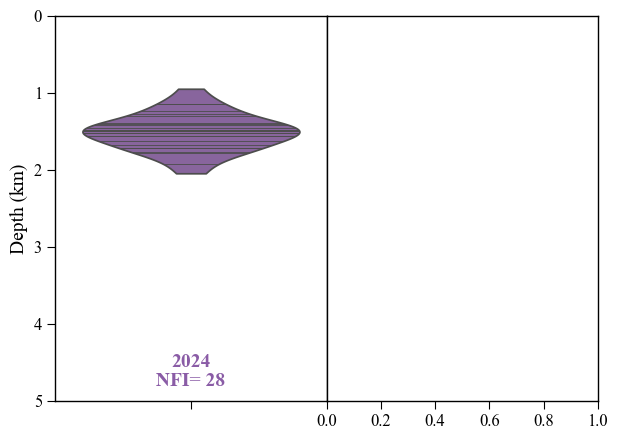

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5), sharey=True)

bins = np.linspace(0, 20, 19)

sns.violinplot(data=filtered_data['SingleCalc_D_km'], color='#8A5CA6',inner='stick',ax=ax1,cut=0)

ax1.set_ylabel('Depth (km)')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis

for ax in (ax1, ax2):
    ax.set_ylim([5, 0])  # Set y-axis limits

     
ax2.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels


ax1.annotate(
    "2024",
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)



ax1.annotate(
    f'NFI= {len(filtered_data)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)

plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots

# plt.tight_layout()
fig.savefig(figpath+slash+'2024_Kil_violin.pdf', format='pdf', dpi=300, transparent=True)


In [25]:
filtered_data[filtered_data['filename'].str.contains("008|009|005")][['filename', 'SingleCalc_D_km','SingleCalc_P_kbar']]

,filename,SingleCalc_D_km,SingleCalc_P_kbar
14,K20_c005_a1_FIA,1.392920,0.322773
15,K20_c005_a2_FIB,1.019686,0.234059
16,K20_c005_a3_FIC,1.245736,0.287590
20,K20_c008_a1_FIA,0.971003,0.222610
21,K20_c008_a2_FIB,1.145195,0.263706
22,K20_c009_a1_FIA,1.302913,0.301227
23,K20_c009_a2_FIB,1.197926,0.276218


In [26]:
filtered_data.columns.to_list()

['filename',
 'Density g/cm3',
 'σ Density g/cm3',
 'σ Density g/cm3 (from Ne+peakfit)',
 'σ Density g/cm3 (from densimeter)',
 'Corrected_Splitting',
 'Corrected_Splitting_σ',
 'Corrected_Splitting_σ_Ne',
 'Corrected_Splitting_σ_peak_fit',
 'power (mW)',
 'Spectral Center',
 'Preferred D_σ_Ne',
 'Preferred D_σ_pkfit',
 'in range',
 'Notes',
 'LowD_RT',
 'HighD_RT',
 'LowD_SC',
 'LowD_SC_σ',
 'MedD_SC',
 'MedD_SC_σ',
 'HighD_SC',
 'HighD_SC_σ',
 'Temperature',
 'Splitting',
 'Split_σ',
 'Diad1_Combofit_Cent',
 'Diad1_cent_err',
 'Diad1_Combofit_Height',
 'Diad1_Voigt_Cent',
 'Diad1_Voigt_Area',
 'Diad1_Voigt_Sigma',
 'Diad1_Residual',
 'Diad1_Prop_Lor',
 'Diad1_fwhm',
 'Diad1_refit',
 'Diad2_Combofit_Cent',
 'Diad2_cent_err',
 'Diad2_Combofit_Height',
 'Diad2_Voigt_Cent',
 'Diad2_Voigt_Area',
 'Diad2_Voigt_Sigma',
 'Diad2_Voigt_Gamma',
 'Diad2_Residual',
 'Diad2_Prop_Lor',
 'Diad2_fwhm',
 'Diad2_refit',
 'HB1_Cent',
 'HB1_Area',
 'HB1_Sigma',
 'HB2_Cent',
 'HB2_Area',
 'HB2_Sigma',
 'C

# Below this is from my KAM notebook for reference

# Now merge the EDS mineral data in

In [27]:
eds_merge_names=pd.read_excel(r"Helper_file.xlsx",sheet_name="EDS_merge")

kam_w_EDSnames=pd.merge(left=kamaehu_averaged_final,left_on='filename',right=eds_merge_names,right_on='filename',how='outer')

EDS_data=pd.read_excel(r"KAM_EDS_110124.xlsx",sheet_name="concatenated_olivines")

EDS_data = EDS_data.loc[:, ~EDS_data.columns.str.contains('^Unnamed')]

EDS_data.columns = [col + '_host' for col in EDS_data.columns] 

kam_w_EDS=pd.merge(left=kam_w_EDSnames,left_on='EDS_name',right=EDS_data,right_on='Sample Name_host',how='outer',suffixes=(None,"_host"))

kam_w_EDS = kam_w_EDS.dropna(subset=['filename'])
kam_w_EDS = kam_w_EDS[~kam_w_EDS['filename'].str.contains("187-1-115-C")]


kam_w_EDS.to_clipboard(excel=True)
kam_w_EDS

FileNotFoundError: [Errno 2] No such file or directory: 'Helper_file.xlsx'

In [102]:
kam_w_EDS[kam_w_EDS["filename"].str.contains("MI")].to_clipboard(excel=True)

# Calculate SO2 mol fraction

In [18]:
kam_w_EDS['SO2 mol%']=pf.calculate_mole_fraction_2comp(peak_area_a=kam_w_EDS['Peak_Area_SO2'], peak_area_b=kam_w_EDS['Diad1_Voigt_Area']+kam_w_EDS['Diad2_Voigt_Area'],
                                  cross_section_a=5.3, cross_section_b=1.4+0.89, instrument_eff_a=1, instrument_eff_b=1)['% A']


kam_w_EDS['Fo']=(kam_w_EDS['MgO']/40.3044)/((kam_w_EDS['MgO']/40.3044)+(kam_w_EDS['FeOt']/71.844))




## Now let's calculate a first temperature from Fo content.

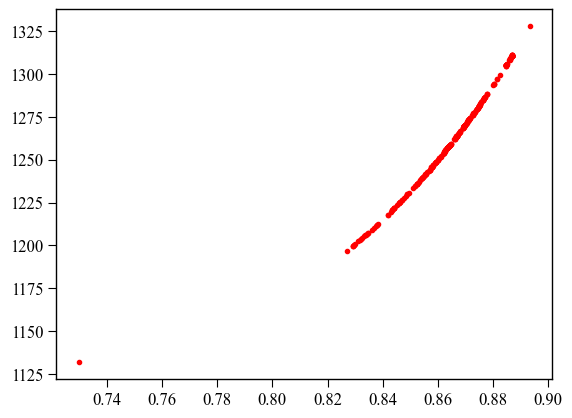

In [19]:
## For now, use the model for Kilauea, I will calculate a new one for Kam later. Need to compile data to do it

with open('TempFoModel.pkl', 'rb') as f:
    Pf_TempFo = pickle.load(f)


kam_w_EDS['Temp_from_Fo_all']=Pf_TempFo(kam_w_EDS['Fo'])
MeanT=np.nanmean(kam_w_EDS['Temp_from_Fo_all'])
kam_w_EDS['Temp_from_Fo_all'] = kam_w_EDS['Temp_from_Fo_all'].fillna(MeanT)

# Create 'Temp_error' column based on whether 'Temp_from_Fo' is a number
kam_w_EDS['Temp_error'] = np.where(kam_w_EDS['Temp_from_Fo_all'] == MeanT, 100, 50)

kam_w_EDS.to_clipboard(excel=True)

plt.plot(kam_w_EDS['Fo'], kam_w_EDS['Temp_from_Fo_all'], '.r')


In [20]:
kam_w_EDS


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Standard Name_Na,Standardization Date_Na,k Ratio_Na,Apparent Concentration_Na,Factory Standard_Na,Line_Na,Fo.1,SO2 mol%,Temp_from_Fo_all,Temp_error
0,186-11-124-A-rep1,0.402550,0.002933,0.001756,0.002349,103.720002,0.003962,0.001356,0.003730,6.037000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
1,186-11-201-MIA-rep1,0.143828,0.006759,0.005516,0.003883,103.113236,0.013920,0.001151,0.013900,12.013250,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
2,186-11-202-MIA-rep1,0.012467,0.006641,0.005341,0.003944,102.781718,0.013480,0.001141,0.013459,12.014000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
3,186-11-203-MIA-rep1,0.018748,0.007723,0.006630,0.003922,102.797570,0.016731,0.001158,0.016725,12.018000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
4,186-11-203-MIB-rep1,0.011673,0.007474,0.006340,0.003948,102.779715,0.016001,0.001176,0.015991,12.047333,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,FG19-101-A-start--Spectrum--023,0.948722,0.003885,0.003543,0.001593,105.001127,0.011360,0.000615,0.011366,6.039000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
1179,FO-1--Spectrum--045,0.094709,0.006650,0.005456,0.003802,102.989274,0.013769,0.002564,0.013559,5.907000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
1180,FO1--Spectrum--105,0.081612,0.006248,0.004958,0.003802,102.956221,0.012512,0.000485,0.012531,12.047000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100
1181,FO1--Spectrum--141,0.090351,0.008203,0.007269,0.003801,102.978275,0.018346,0.000574,0.018379,11.950000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100


# Now calculate pure CO2 pressure as starting point

In [21]:
P_SW96=pf.calculate_P_for_rho_T(CO2_dens_gcm3=kam_w_EDS['Density g/cm3'], 
                                T_K=kam_w_EDS['Temp_from_Fo_all']+273.15, EOS='SW96')
P_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,1.649249,164.924933,1535.729511,0.402550
1,0.462825,46.282517,1535.729511,0.143828
2,0.036476,3.647553,1535.729511,0.012467
3,0.055087,5.508738,1535.729511,0.018748
4,0.034135,3.413479,1535.729511,0.011673


## Now let's calculate XH2O from the Schipper polynomial

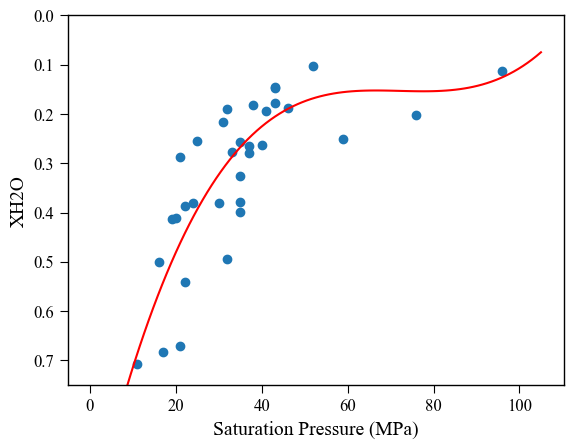

In [22]:
schipperMI=pd.read_excel(r"kamaehu_MI_Schipper11.xlsx")
schipperMI.head()

P_MI_MPa=schipperMI["SaturationP_bars_VESIcal"]/10
plt.scatter(P_MI_MPa,schipperMI["XH2O_fl_VESIcal"])
plt.ylim([0.75,0])
plt.xlabel("Saturation Pressure (MPa)")
plt.ylabel("XH2O")

filt=~(P_MI_MPa.between(55,70))
x=P_MI_MPa[filt]
y=schipperMI["XH2O_fl_VESIcal"][filt]
Pf = np.poly1d(np.polyfit(x, y,
                          3))
Px = np.linspace(0, 105, 101)
Py = Pf(Px)
plt.plot(Px, Py, '-r',label='Measured H$_2$O')

import pickle

with open('XH2O_fromschipperMI_Kam.pkl', 'wb') as f:
    pickle.dump(Pf, f)

In [23]:
with open('XH2O_fromschipperMI_Kam.pkl', 'rb') as f:
    Pf_xh2o = pickle.load(f)

XH2O_av=Pf_xh2o(P_SW96['P_MPa'])
XH2O_av[XH2O_av<0]=0.02

kam_w_EDS['XH2O']=XH2O_av
kam_w_EDS['XH2O']=kam_w_EDS['XH2O'].fillna(0)
kam_w_EDS

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Standardization Date_Na,k Ratio_Na,Apparent Concentration_Na,Factory Standard_Na,Line_Na,Fo.1,SO2 mol%,Temp_from_Fo_all,Temp_error,XH2O
0,186-11-124-A-rep1,0.402550,0.002933,0.001756,0.002349,103.720002,0.003962,0.001356,0.003730,6.037000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.020000
1,186-11-201-MIA-rep1,0.143828,0.006759,0.005516,0.003883,103.113236,0.013920,0.001151,0.013900,12.013250,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.188504
2,186-11-202-MIA-rep1,0.012467,0.006641,0.005341,0.003944,102.781718,0.013480,0.001141,0.013459,12.014000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.906701
3,186-11-203-MIA-rep1,0.018748,0.007723,0.006630,0.003922,102.797570,0.016731,0.001158,0.016725,12.018000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.846074
4,186-11-203-MIB-rep1,0.011673,0.007474,0.006340,0.003948,102.779715,0.016001,0.001176,0.015991,12.047333,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.914566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,FG19-101-A-start--Spectrum--023,0.948722,0.003885,0.003543,0.001593,105.001127,0.011360,0.000615,0.011366,6.039000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.020000
1179,FO-1--Spectrum--045,0.094709,0.006650,0.005456,0.003802,102.989274,0.013769,0.002564,0.013559,5.907000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.330536
1180,FO1--Spectrum--105,0.081612,0.006248,0.004958,0.003802,102.956221,0.012512,0.000485,0.012531,12.047000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.391952
1181,FO1--Spectrum--141,0.090351,0.008203,0.007269,0.003801,102.978275,0.018346,0.000574,0.018379,11.950000,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1262.579511,100,0.349782


# And now calculate P using the XH2O estimated

In [24]:
P_DZ06=pf.calculate_entrapment_P_XH2O(XH2O=kam_w_EDS['XH2O'], CO2_dens_gcm3=kam_w_EDS['Density g/cm3'],
                 T_K=kam_w_EDS['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

## One more iteration, just to make sure it doesn't change 

XH2O_av2=Pf_xh2o(100*P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_av2[XH2O_av2<0]=0
kam_w_EDS['XH2O']=XH2O_av2
kam_w_EDS['XH2O']=kam_w_EDS['XH2O'].fillna(0)

P_DZ062=pf.calculate_entrapment_P_XH2O(XH2O=kam_w_EDS['XH2O'], CO2_dens_gcm3=kam_w_EDS['Density g/cm3'],
                 T_K=kam_w_EDS['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

# Now propagate uncertainty

In [25]:
## Duan and Zhang Error propagate. 
MC_Av_rho_T_CDH, MC_All_rho_T_CDH, fig=pf.propagate_FI_uncertainty(
T_K=kam_w_EDS['Temp_from_Fo_all']+273.15,error_T_K=kam_w_EDS['Temp_error'], error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=kam_w_EDS['Density g/cm3'],error_CO2_dens=kam_w_EDS['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=kam_w_EDS['XH2O'], error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=kam_w_EDS['filename'],
model='three-step',d1=1,rho1=1017,d2=7,rho2=2750, rho3=3200,error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal', 
N_dup=500, fig_i=0, plot_figure=False)

MC_Av_rho_T_CDH.head()

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,186-11-124-A-rep1,0.0,0.402550,6.719292,1.642690,1.697229,1.677271,0.140741,0.136528,6.897360,...,1535.729511,100.0,0.402550,0.002933,None,5.0,three-step,DZ06,0.000000,0.05
1,186-11-201-MIA-rep1,1.0,0.143828,2.667039,0.549493,0.556274,0.551640,0.057507,0.055679,2.692175,...,1535.729511,100.0,0.143828,0.006759,None,5.0,three-step,DZ06,0.159305,0.05
2,186-11-202-MIA-rep1,2.0,0.012467,0.485115,0.048399,0.049912,0.049841,0.026177,0.025083,0.497649,...,1535.729511,100.0,0.012467,0.006641,None,5.0,three-step,DZ06,0.247783,0.05
3,186-11-203-MIA-rep1,3.0,0.018748,0.759814,0.075805,0.077922,0.077761,0.032218,0.031085,0.749552,...,1535.729511,100.0,0.018748,0.007723,None,5.0,three-step,DZ06,0.275544,0.05
4,186-11-203-MIB-rep1,4.0,0.011673,0.450183,0.044914,0.046498,0.046741,0.029038,0.027550,0.462685,...,1535.729511,100.0,0.011673,0.007474,None,5.0,three-step,DZ06,0.241306,0.05


## Merge into main dataframe

In [26]:
kamaehu_PMC=pd.merge(left=kam_w_EDS,right=MC_Av_rho_T_CDH, left_on='filename',right_on='Filename')
kamaehu_PMC

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,186-11-124-A-rep1,0.402550,0.002933,0.001756,0.002349,103.720002,0.003962,0.001356,0.003730,6.037000,...,1535.729511,100.0,0.402550,0.002933,None,5.0,three-step,DZ06,0.000000,0.05
1,186-11-201-MIA-rep1,0.143828,0.006759,0.005516,0.003883,103.113236,0.013920,0.001151,0.013900,12.013250,...,1535.729511,100.0,0.143828,0.006759,None,5.0,three-step,DZ06,0.159305,0.05
2,186-11-202-MIA-rep1,0.012467,0.006641,0.005341,0.003944,102.781718,0.013480,0.001141,0.013459,12.014000,...,1535.729511,100.0,0.012467,0.006641,None,5.0,three-step,DZ06,0.247783,0.05
3,186-11-203-MIA-rep1,0.018748,0.007723,0.006630,0.003922,102.797570,0.016731,0.001158,0.016725,12.018000,...,1535.729511,100.0,0.018748,0.007723,None,5.0,three-step,DZ06,0.275544,0.05
4,186-11-203-MIB-rep1,0.011673,0.007474,0.006340,0.003948,102.779715,0.016001,0.001176,0.015991,12.047333,...,1535.729511,100.0,0.011673,0.007474,None,5.0,three-step,DZ06,0.241306,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,FG19-101-A-start--Spectrum--023,0.948722,0.003885,0.003543,0.001593,105.001127,0.011360,0.000615,0.011366,6.039000,...,1535.729511,100.0,0.948722,0.003885,None,5.0,three-step,DZ06,0.000000,0.05
3296,FO-1--Spectrum--045,0.094709,0.006650,0.005456,0.003802,102.989274,0.013769,0.002564,0.013559,5.907000,...,1535.729511,100.0,0.094709,0.006650,None,5.0,three-step,DZ06,0.207224,0.05
3297,FO1--Spectrum--105,0.081612,0.006248,0.004958,0.003802,102.956221,0.012512,0.000485,0.012531,12.047000,...,1535.729511,100.0,0.081612,0.006248,None,5.0,three-step,DZ06,0.225044,0.05
3298,FO1--Spectrum--141,0.090351,0.008203,0.007269,0.003801,102.978275,0.018346,0.000574,0.018379,11.950000,...,1535.729511,100.0,0.090351,0.008203,None,5.0,three-step,DZ06,0.213034,0.05


## Now calculate Depth considering the water (no error propagation, like a 4 step model)

In [27]:
kamaehu_PMC['P_MPa_minus10']=kamaehu_PMC['SingleCalc_P_kbar']*100-10
kamaehu_PMC['Depth_km_4step']=pf.convert_pressure_to_depth(P_kbar=kamaehu_PMC['P_MPa_minus10']/100,model='three-step',d1=7,rho1=2650,d2=11,rho2=2900,rho3=3200)+1


## Read in EQ catalog USGS

In [28]:
from datetime import datetime

date_time_str = "2023-12-15T03:51:02.430Z"
date_time_obj = datetime.strptime(date_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")

eqs=pd.read_csv("query.csv")

eqs['time'] = pd.to_datetime(eqs['time'], format="%Y-%m-%dT%H:%M:%S.%fZ")

eqs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-04-02 18:51:37.600,19.051000,-155.364000,33.540,2.76,ml,42.0,209.0,0.1393,0.12,...,2024-04-07T18:19:23.040Z,"20 km SE of Pāhala, Hawaii",earthquake,0.50,0.75,0.088375,9.0,reviewed,hv,hv
1,2024-02-23 00:35:31.260,18.846333,-155.210000,10.780,3.27,ml,48.0,259.0,0.3891,0.13,...,2024-02-24T14:31:16.655Z,"46 km ESE of Naalehu, Hawaii",earthquake,0.51,0.68,0.187883,30.0,reviewed,hv,hv
2,2024-02-22 22:19:44.820,18.840667,-155.201333,9.710,3.04,ml,48.0,260.0,0.3986,0.14,...,2024-03-01T04:27:54.040Z,"47 km ESE of Naalehu, Hawaii",earthquake,0.59,0.60,0.153374,16.0,reviewed,hv,hv
3,2024-02-07 00:39:04.320,18.993333,-155.307667,8.310,2.57,ml,40.0,271.0,0.2176,0.22,...,2024-04-20T19:33:36.040Z,"29 km SE of Pāhala, Hawaii",earthquake,0.55,0.56,0.205284,16.0,reviewed,hv,hv
4,2024-02-05 12:28:25.520,18.865833,-155.206497,4.730,2.52,md,16.0,293.0,0.3761,0.15,...,2024-04-20T19:33:01.040Z,"45 km ESE of Naalehu, Hawaii",earthquake,0.90,1.25,0.190000,3.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1962-03-21 22:26:52.880,18.957667,-155.379833,2.533,2.85,ml,6.0,261.0,NaN,0.14,...,2020-03-31T18:31:05.600Z,"24 km ESE of Naalehu, Hawaii",earthquake,2.19,1.84,0.120000,4.0,reviewed,hv,hv
1543,1961-04-12 23:52:30.960,18.907000,-155.245667,8.389,3.53,ml,7.0,286.0,NaN,0.06,...,2020-03-31T18:51:09.100Z,"39 km ESE of Naalehu, Hawaii",earthquake,1.91,1.17,0.100000,2.0,reviewed,hv,hv
1544,1961-01-08 01:50:22.600,18.811667,-155.166500,5.911,3.32,ml,5.0,348.0,NaN,0.08,...,2020-03-31T18:30:53.010Z,"51 km ESE of Naalehu, Hawaii",earthquake,8.36,10.86,NaN,1.0,reviewed,hv,hv
1545,1960-07-16 03:41:24.910,18.739667,-155.104500,5.901,3.46,ml,6.0,325.0,NaN,0.08,...,2020-03-31T17:07:31.590Z,"61 km SE of Naalehu, Hawaii",earthquake,8.18,10.59,0.220000,4.0,reviewed,hv,hv


## Remove P and D calcs from MI rows, and D calcs from standards

In [29]:
columns_to_replace = [
    "Temp_from_Fo_all", "Temp_error", "XH2O", "Filename", "i", "CO2_density_input",
    "SingleCalc_D_km", "SingleCalc_P_kbar", "Mean_MC_P_kbar", "Med_MC_P_kbar", 
    "std_dev_MC_P_kbar", "std_dev_MC_P_kbar_from_percentile", "Mean_MC_D_km", 
    "Med_MC_D_km", "std_dev_MC_D_km", "std_dev_MC_D_km_from_percentile", 
    "T_K_input", "error_T_K", "CO2_dens_gcm3_input", "error_CO2_dens_gcm3", 
    "crust_dens_kgm3_input", "error_crust_dens_kgm3", "model", "EOS", 
    "XH2O_input", "error_XH2O", "P_MPa_minus10", "Depth_km_4step"
]

kamaehu_PMC.loc[kamaehu_PMC['filename'].str.contains('MI|FG|FO', na=False), columns_to_replace] = np.nan

kamaehu_PMC.to_clipboard(excel=True)

## Mean by crystal. 

In [30]:
# grouped = kamaehu_PMC.groupby('Sample-Crystal')

# # Separate numeric and non-numeric columns
# numeric_cols = kamaehu_PMC.select_dtypes(include='number')
# non_numeric_cols = kamaehu_PMC.select_dtypes(exclude='number')

# # Aggregate numeric columns by mean and standard deviation
# numeric_kamaehu_xtal_averaged_mean = grouped[numeric_cols.columns].mean()
# numeric_kamaehu_xtal_averaged_std = grouped[numeric_cols.columns].std()

# # Take the first instance for non-numeric columns
# non_numeric_kamaehu_xtal_averaged = grouped[non_numeric_cols.columns].first()

# # Concatenate kamaehu_xtal_averageds and reindex columns to the original order
# kamaehu_xtal_averaged = pd.concat([numeric_kamaehu_xtal_averaged_mean, non_numeric_kamaehu_xtal_averaged], axis=1)
# kamaehu_xtal_averaged = kamaehu_xtal_averaged.reindex(columns=kamaehu_PMC.columns)

# # Add standard deviation columns after reindexing
# kamaehu_xtal_averaged = pd.concat([kamaehu_xtal_averaged, numeric_kamaehu_xtal_averaged_std.add_suffix('_std')], axis=1)

# # Reset index to get a DataFrame
# kamaehu_xtal_averaged = kamaehu_xtal_averaged.reset_index(drop=True)

# row_counts = grouped.size().reset_index(name='row_count')

# # Add a new column "averaged?" based on the row count
# row_counts['averaged?'] = 'No'
# row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# # Merge the row counts back to the aggregated DataFrame
# kamaehu_xtal_averaged = pd.merge(kamaehu_xtal_averaged, row_counts[['FI_namSample-Crystal', 'averaged?']], on='Sample-Crystal', how='left')

# # If there are missing values (groups with a single row), fill them with 'No'
# kamaehu_xtal_averaged['averaged?'] = kamaehu_xtal_averaged['averaged?'].fillna('No')

# #exclude a weird null average spectrum
# kamaehu_xtal_averaged=kamaehu_xtal_averaged[~(kamaehu_xtal_averaged['filename'].str.contains("186-9-118-A"))]
# kamaehu_xtal_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_xtal_averaged.xlsx")

# kamaehu_xtal_averaged


# Filter the data to ignore MI and standards

In [31]:
filtered_data = kamaehu_PMC[~kamaehu_PMC['filename'].str.contains('FG|MI|FO')]

## Create sample filters
alkbas = filtered_data['filename'].str.contains('187-1|L87|L1|KA71')
trans = filtered_data['filename'].str.contains('186-9|L69|KA69')
alk = filtered_data['filename'].str.contains('186-11|L11|KA611')
# thol_1 = filtered_data['filename'].str.contains('187-8|KA78')
thol = filtered_data['filename'].str.contains('187-9|L79|KA79|187-8|KA78')

## Pressure histograms

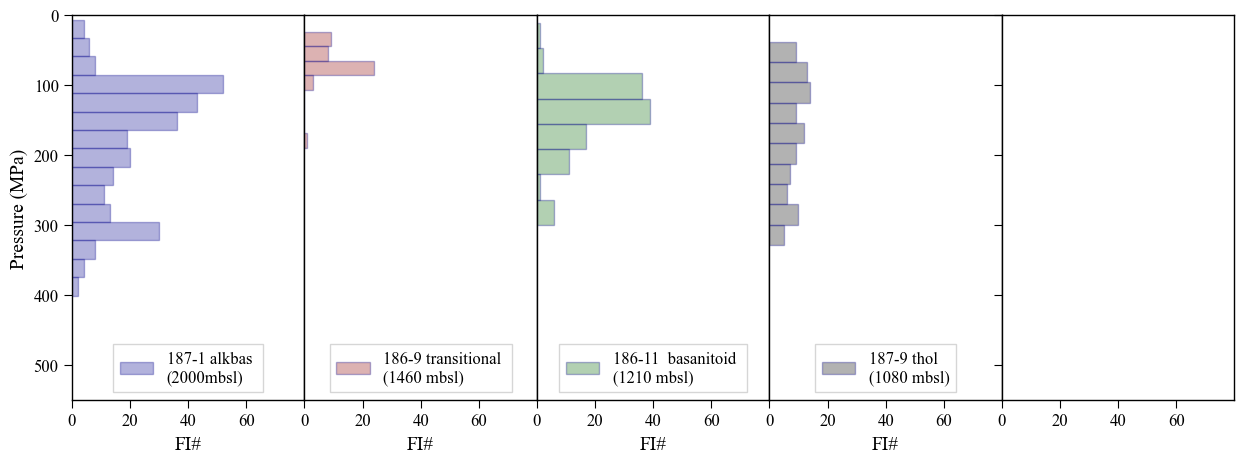

In [32]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Plotting histograms
ax1.hist(filtered_data['SingleCalc_P_kbar'][alkbas]*100, ec='darkblue', fc='darkblue', bins=15, alpha=0.3, label='187-1 alkbas \n(2000mbsl)', orientation='horizontal')
ax1.legend(loc='lower center')
ax1.set_xlabel('FI#')
ax1.set_ylabel('Pressure (MPa)')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis
ax1.set_ylim([550, 0])  # Set y-axis limits

ax2.hist(filtered_data['SingleCalc_P_kbar'][trans]*100, ec='darkblue', fc='darkred', bins=8, alpha=0.3, label='186-9 transitional \n(1460 mbsl)', orientation='horizontal')
ax2.legend(loc='lower center')
ax2.set_xlabel('FI#')
ax2.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax2.set_ylim([550, 0])  # Set y-axis limits

ax3.hist(filtered_data['SingleCalc_P_kbar'][alk]*100, ec='darkblue', fc='darkgreen', bins=8, alpha=0.3, label='186-11  basanitoid \n(1210 mbsl)', orientation='horizontal')
ax3.legend(loc='lower center')
ax3.set_xlabel('FI#')
ax3.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax3.set_ylim([550, 0])  # Set y-axis limits

ax4.hist(filtered_data['SingleCalc_P_kbar'][thol]*100, ec='darkblue', fc='k', bins=10, alpha=0.3, label='187-9 thol \n(1080 mbsl)', orientation='horizontal')
ax4.legend(loc='lower center')
ax4.set_xlabel('FI#')
ax4.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax4.set_ylim([550, 0])  # Set y-axis limits

plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots
for ax in (ax1, ax2, ax3, ax4, ax5):
    max_limit = 80  # Get the current max limit
    if max_limit == 0:
        continue  # Skip if max limit is 0 to avoid division by zero
    
    # Calculate tick spacing based on max limit
    tick_spacing = max_limit / 4
    
    # Generate ticks
    ticks = np.arange(0, max_limit, tick_spacing)
    
    # Exclude the last tick if it equals the max limit
    if ticks[-1] == max_limit:
        ticks = ticks[:-1]
    
    ax.set_xlim([0, max_limit])  # Set the x-axis limits
    ax.set_xticks(ticks)  # Set the ticks for the x-axis

# plt.tight_layout()
fig.savefig(figpath+slash+'editable_figure_P.pdf', format='pdf', dpi=300, transparent=True)

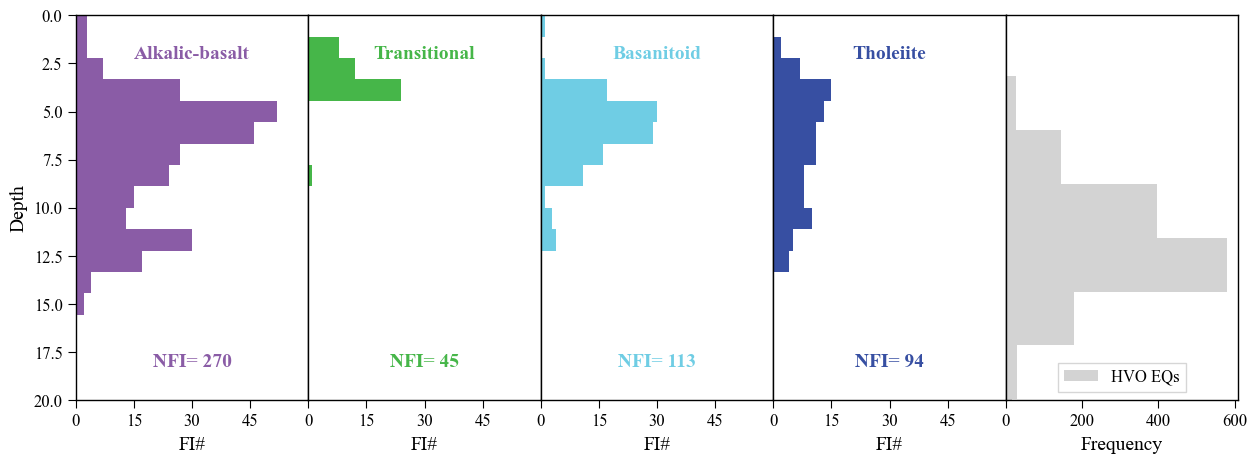

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

bins = np.linspace(0, 20, 19)

# Plotting histograms
# ax1.hist(filtered_data['SingleCalc_D_km'][alkbas], ec='k', histtype='step', bins=15, alpha=0.3, label='2 step model', orientation='horizontal')
ax1.hist(filtered_data['Depth_km_4step'][alkbas], ec='none', fc='#8A5CA6', bins=bins, alpha=1, label='187-1 alkbas \n(2000mbsl)', orientation='horizontal')
# ax1.legend(loc='lower center')

# sns.violinplot(data=filtered_data['Depth_km_4step'][alkbas], inner='stick',ax=ax5)


ax1.set_xlabel('FI#')
ax1.set_ylabel('Depth')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis
ax1.set_ylim([20, 0])  # Set y-axis limits

# ax2.hist(filtered_data['SingleCalc_D_km'][trans], ec='k', histtype='step', bins=8, alpha=0.3, label='2step', orientation='horizontal')
ax2.hist(filtered_data[['Depth_km_4step']][trans], ec='none', fc='#46B649', bins=bins, alpha=1, label='186-9 transitional \n(1460 mbsl)', orientation='horizontal')
# ax2.legend(loc='lower center')
ax2.set_xlabel('FI#')
ax2.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax2.set_ylim([20, 0])  # Set y-axis limits

# ax3.hist(filtered_data['SingleCalc_D_km'][alk], ec='k', histtype='step', bins=8, alpha=0.3, label='2step', orientation='horizontal')
ax3.hist(filtered_data['Depth_km_4step'][alk], ec='none', fc='#6FCDE4', bins=bins, alpha=1, label='186-11  basanitoid \n(1210 mbsl)', orientation='horizontal')
# ax3.legend(loc='lower center')
ax3.set_xlabel('FI#')
ax3.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax3.set_ylim([20, 0])  # Set y-axis limits

# ax4.hist(filtered_data['SingleCalc_D_km'][thol], histtype='step', edgecolor='black', bins=10, alpha=0.3, label='2step', orientation='horizontal')
ax4.hist(filtered_data['Depth_km_4step'][thol], ec='none', fc='#374FA2', bins=bins, alpha=1, label='187-9 thol \n(1080 mbsl)', orientation='horizontal')
# ax4.legend(loc='lower center')
ax4.set_xlabel('FI#')
ax4.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax4.set_ylim([20, 0])  # Set y-axis limits


for ax in (ax1, ax2, ax3, ax4):
    max_limit = 60  # Get the current max limit
    if max_limit == 0:
        continue  # Skip if max limit is 0 to avoid division by zero
    
    # Calculate tick spacing based on max limit
    tick_spacing = max_limit / 4
    
    # Generate ticks
    ticks = np.arange(0, max_limit, tick_spacing)
    
    # Exclude the last tick if it equals the max limit
    if ticks[-1] == max_limit:
        ticks = ticks[:-1]
    
    ax.set_xlim([0, max_limit])  # Set the x-axis limits
    ax.set_xticks(ticks)  # Set the ticks for the x-axis


ax5.hist(eqs['depth'], ec='none', fc='lightgrey', bins=20, label='HVO EQs', orientation='horizontal')
ax5.set_xlabel('Frequency')
ax5.legend(loc='lower center')
ax5.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax5.set_ylim([20, 0])  # Set y-axis limits
ax1.annotate(
    "Alkalic-basalt",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)
ax2.annotate(
    "Transitional",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#46B649',
    fontweight='bold'
)
ax3.annotate(
    "Basanitoid",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#6FCDE4',
    fontweight='bold'
)
ax4.annotate(
    "Tholeiite",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#374FA2',
    fontweight='bold'
)

ax1.annotate(
    f'NFI= {len(filtered_data[alkbas])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)
ax2.annotate(
    f'NFI= {len(filtered_data[trans])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#46B649',
    fontweight='bold'
)

ax3.annotate(
    f'NFI= {len(filtered_data[alk])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#6FCDE4',
    fontweight='bold'
)
ax4.annotate(f'NFI= {len(filtered_data[thol])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#374FA2',
    fontweight='bold'
)
plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots

# plt.tight_layout()
fig.savefig(figpath+slash+'editable_figure.pdf', format='pdf', dpi=300, transparent=True)


## import caplan quakes

In [34]:
quakes_obs=pd.read_csv("Kam_quakes_caplan.csv",header=None)
quakes_obs=quakes_obs.rename(columns={0: "Latitude (degrees)", 1: "Depth (km)"})
quakes_obs.head()

,Latitude (degrees),Depth (km)
0,18.949072,7.494163
1,18.938992,7.525292
2,18.919894,7.805447
3,18.933156,8.054475
4,18.933687,8.303502


## import loa and kil

In [35]:
loa=pd.read_excel(r"ML_for_Charlotte.xlsx")
kil=pd.read_excel(r"KIL.xlsx")
loa['D(km)_HC']
kil['Depth (km)']

0      1.193235
1      1.409866
2      1.596183
3      1.819663
4      2.041608
         ...   
310    1.288929
311    1.431997
312    1.554120
313    1.496305
314    2.046003
Name: Depth (km), Length: 315, dtype: float64

## import hualalai

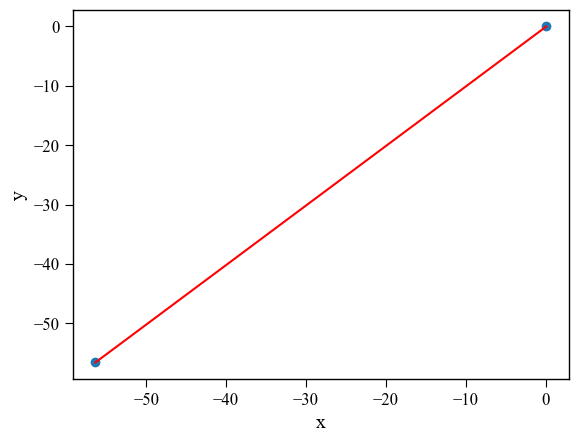

,Bulk_gcm3low,Liq_gcm3low,Gas_gcm3low,T_h_Clow,homog_tolow,Sample_ID,Bulk_gcm3high,Liq_gcm3high,Gas_gcm3high,T_h_Chigh,homog_tohigh,Mean_Bulk_gcm3,Std_Bulk_gcm3
0,0.644372,0.644372,0.298631,28.450265,L,-56.65,0.641790,0.641790,0.300910,28.550442,L,0.643081,0.001825
1,0.644372,0.644372,0.298631,28.450265,L,-56.65,0.639143,0.639143,0.303254,28.650619,L,0.641757,0.003697
2,0.644372,0.644372,0.298631,28.450265,L,-56.65,0.644372,0.644372,0.298631,28.450265,L,0.644372,0.000000
3,0.649354,0.649354,0.294251,28.249912,L,-57.65,0.646892,0.646892,0.296412,28.350088,L,0.648123,0.001741
4,0.641790,0.641790,0.300910,28.550442,L,-56.65,0.641790,0.641790,0.300910,28.550442,L,0.641790,0.000000
5,0.641790,0.641790,0.300910,28.550442,L,-56.65,0.639143,0.639143,0.303254,28.650619,L,0.640467,0.001872
6,0.641790,0.641790,0.300910,28.550442,L,-56.65,0.644372,0.644372,0.298631,28.450265,L,0.643081,0.001825
7,0.646892,0.646892,0.296412,28.350088,L,-56.65,0.641790,0.641790,0.300910,28.550442,L,0.644341,0.003607
8,0.646892,0.646892,0.296412,28.350088,L,-56.65,0.639143,0.639143,0.303254,28.650619,L,0.643017,0.005479
9,0.646892,0.646892,0.296412,28.350088,L,-56.65,0.644372,0.644372,0.298631,28.450265,L,0.645632,0.001782


You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,Hualalai_81863_c1_FI2,0.0,0.643081,13.287894,3.615584,3.669927,3.631839,0.403222,0.377657,13.466948,...,1373.15,100.0,0.643081,0.001825,None,5.0,three-step,DZ06,0.1,0.05
1,Hualalai_81863_c1_FI3,1.0,0.641757,13.236877,3.601570,3.656407,3.621238,0.403150,0.379077,13.418671,...,1373.15,100.0,0.641757,0.003697,None,5.0,three-step,DZ06,0.1,0.05
2,Hualalai_81863_c1_FI4,2.0,0.644372,13.337797,3.629291,3.683229,3.644254,0.404254,0.380657,13.514318,...,1373.15,100.0,0.644372,0.000000,None,5.0,three-step,DZ06,0.1,0.05
3,Hualalai_81863_c1_FI5,3.0,0.648123,13.483668,3.669359,3.724829,3.686494,0.409850,0.383500,13.661970,...,1373.15,100.0,0.648123,0.001741,None,5.0,three-step,DZ06,0.1,0.05
4,Hualalai_81863_c1_FI6,4.0,0.641790,13.238138,3.601917,3.655270,3.616915,0.400867,0.377556,13.414853,...,1373.15,100.0,0.641790,0.000000,None,5.0,three-step,DZ06,0.1,0.05


In [36]:
hualalai=pd.read_excel("hualalai.xlsx")
from scipy.stats import linregress
import pickle
# Your data points
x = np.array([-56.4,0.1])
y = np.array([-56.6,0.0])

# Fit a linear regression model to your data
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Store the model coefficients in a dictionary
model = {'slope': slope, 'intercept': intercept}

# Store the model in a pickle file
with open('linkam_cali_reg.pkl', 'wb') as f:
    pickle.dump(model, f)



# Plot the data along with the regression line
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color='red')
plt.xlabel('x')
plt.ylabel('y')

plt.show()


# Load the model from the pickle file
with open('linkam_cali_reg.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict new values
def correct_Th(*,model,Th):
    Th_array = np.array(Th)
    T_cal = model['slope'] * Th_array + model['intercept']
    return T_cal

# Load the model from the pickle file
with open('linkam_cali_reg.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict new values
def correct_Th(*,model,Th):
    Th_array = np.array(Th)
    T_cal = model['slope'] * Th_array + model['intercept']
    return T_cal

Tlow=hualalai['Th_low']
Thigh=hualalai['Th_high']
Tmelt=hualalai['Tmelt']
sample_ID=hualalai['Tmelt']
Ts=[Tlow,Thigh]

Tcorr_dict={}
for T in Ts:
    name=T.name
    T_corr=correct_Th(model=model,Th=T)
    Tcorr_dict[name]=T_corr

rho_dict={}
for T in Tcorr_dict:
    if 'melt' not in T:
        rho=pf.calculate_CO2_density_homog_T(T_h_C=Tcorr_dict[T], Sample_ID=sample_ID,
                                    homog_to='L', EOS='SW96')
        rho_dict[T]=rho

rho_merge=pd.merge(rho_dict['Th_low'],rho_dict['Th_high'],on='Sample_ID',suffixes=['low','high'])

rho_merge['Mean_Bulk_gcm3']=rho_merge[['Bulk_gcm3low', 'Bulk_gcm3high']].mean(axis=1)
rho_merge['Std_Bulk_gcm3']=rho_merge[['Bulk_gcm3low', 'Bulk_gcm3high']].std(axis=1)

display(rho_merge)
hualalai['CO2_density_gcm3']=rho_merge['Mean_Bulk_gcm3']
hualalai['CO2_density_gcm3_st']=rho_merge['Std_Bulk_gcm3']


## Duan and Zhang Error propagate. 
MC_Av_hualalai, MC_All_hualalai, fig=pf.propagate_FI_uncertainty(
T_K=1100+273.15,error_T_K=100, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=hualalai['CO2_density_gcm3'],error_CO2_dens=hualalai['CO2_density_gcm3_st'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=0.1, error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=hualalai['Sample_ID'],
model='three-step',d1=7,rho1=2750,d2=15,rho2=2800, rho3=3200,error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal', 
N_dup=500, fig_i=0, plot_figure=False)

MC_Av_hualalai.head()



In [37]:
hualalai['P (kbar)']=MC_Av_hualalai['SingleCalc_P_kbar']
hualalai['Depth (km)']=MC_Av_hualalai['SingleCalc_D_km']
hualalai

,Tmelt,Th_low,Th_high,Sample_ID,CO2_density_gcm3,CO2_density_gcm3_st,P (kbar),Depth (km)
0,-56.65,28.5,28.6,Hualalai_81863_c1_FI2,0.643081,0.001825,3.615584,13.287894
1,-57.65,28.3,28.4,Hualalai_81863_c1_FI3,0.641757,0.003697,3.601570,13.236877
2,-56.65,28.6,28.7,Hualalai_81863_c1_FI4,0.644372,0.000000,3.629291,13.337797
3,-56.65,28.4,28.5,Hualalai_81863_c1_FI5,0.648123,0.001741,3.669359,13.483668
4,-56.55,28.1,28.2,Hualalai_81863_c1_FI6,0.641790,0.000000,3.601917,13.238138
5,-56.85,28.2,28.3,Hualalai_81863_c2_FI1,0.640467,0.001872,3.587944,13.187269
6,-56.75,27.9,28.0,Hualalai_81863_c2_FI3,0.643081,0.001825,3.615584,13.287894
7,NaN,27.4,27.5,Hualalai_81863_c2_FI4,0.644341,0.003607,3.628965,13.336609
8,-56.35,29.0,29.1,Hualalai_81863_c3_FI1,0.643017,0.005479,3.614911,13.285446
9,-56.25,28.7,28.8,Hualalai_81863_c3_FI2,0.645632,0.001782,3.642711,13.386655


## Plot dive sample alone

In [ ]:
KA961=kamaehu[kamaehu['filename'].str.contains("KA961")]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=1200+273.15,
                CO2_dens_gcm3=KA961['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)


import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

bins = np.linspace(0, 20, 19)

sns.violinplot(data=Depth, color='#8A5CA6',inner='stick',ax=ax1,cut=0)
ax1.set_ylabel("Depth (km)")
ax1.set_ylim([12,0])

## Plot all

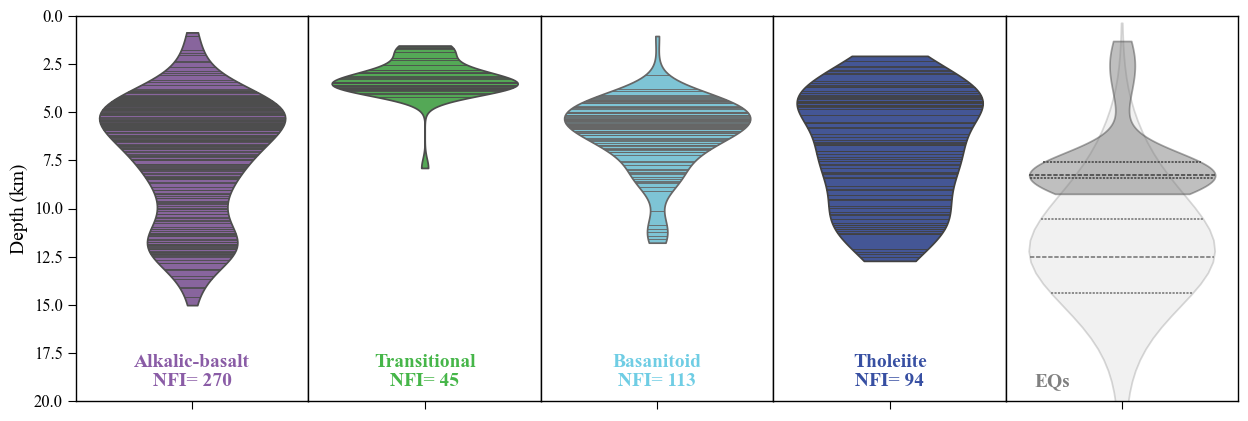

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

bins = np.linspace(0, 20, 19)

sns.violinplot(data=filtered_data['Depth_km_4step'][alkbas], color='#8A5CA6',inner='stick',ax=ax1,cut=0)
sns.violinplot(data=filtered_data['Depth_km_4step'][trans], color='#46B649',inner='stick',ax=ax2,cut=0)
sns.violinplot(data=filtered_data['Depth_km_4step'][alk], color='#6FCDE4',inner='stick',ax=ax3,cut=0)
sns.violinplot(data=filtered_data['Depth_km_4step'][thol], color='#374FA2',inner='stick',ax=ax4,cut=0)
sns.violinplot(data=eqs['depth'], color='lightgrey',inner='quart',alpha=0.3,ax=ax5,cut=0)
sns.violinplot(data=quakes_obs['Depth (km)'], color='grey',inner='quart',alpha=0.5,ax=ax5,cut=0)

ax1.set_ylabel('Depth (km)')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis

for ax in (ax1, ax2, ax3, ax4, ax5):
    ax.set_ylim([20, 0])  # Set y-axis limits
    if ax in (ax2,ax3,ax4,ax5):      
        ax.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels


ax1.annotate(
    "Alkalic-basalt",
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)
ax2.annotate(
    "Transitional",
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#46B649',
    fontweight='bold'
)
ax3.annotate(
    "Basanitoid",
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#6FCDE4',
    fontweight='bold'
)
ax4.annotate(
    "Tholeiite",
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#374FA2',
    fontweight='bold'
)

ax1.annotate(
    f'NFI= {len(filtered_data[alkbas])}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)
ax2.annotate(
    f'NFI= {len(filtered_data[trans])}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#46B649',
    fontweight='bold'
)

ax3.annotate(
    f'NFI= {len(filtered_data[alk])}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#6FCDE4',
    fontweight='bold'
)
ax4.annotate(f'NFI= {len(filtered_data[thol])}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#374FA2',
    fontweight='bold'
)
ax5.annotate(f'EQs',
    xy=(0.2, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='Grey',
    fontweight='bold'
)
plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots

# plt.tight_layout()
fig.savefig(figpath+slash+'editable_figure.pdf', format='pdf', dpi=300, transparent=True)


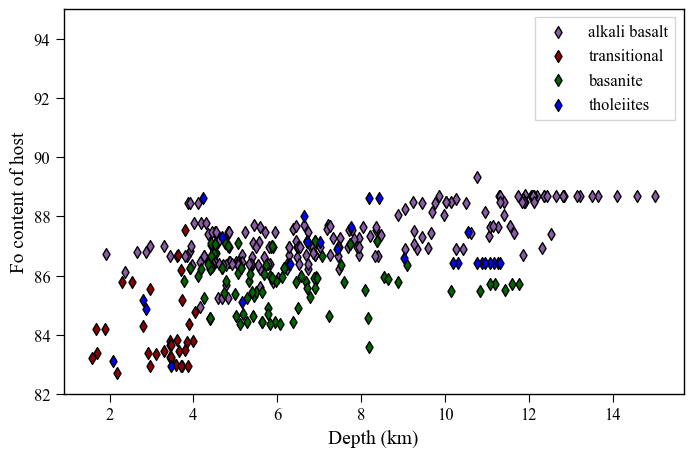

In [39]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))


# ax1.errorbar(filtered_data['Fo'][alkbas]*100, filtered_data['SingleCalc_D_km'][alkbas], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][alkbas],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkblue', ms=5, mec='k', capsize=3, label='187-1 alkbas \n(2000mbsl)',zorder=0)
ax1.scatter( filtered_data['Depth_km_4step'][alkbas], filtered_data['Fo'][alkbas]*100,
             marker='d',   facecolor='#8A5CA6', edgecolor='k', label='alkali basalt',zorder=1)
ax1.scatter( filtered_data['Depth_km_4step'][trans], filtered_data['Fo'][trans]*100,
             marker='d',   facecolor='darkred', edgecolor='k', label='transitional',zorder=1)
ax1.scatter( filtered_data['Depth_km_4step'][alk], filtered_data['Fo'][alk]*100,
             marker='d',   facecolor='darkgreen', edgecolor='k', label='basanite',zorder=1)
ax1.scatter( filtered_data['Depth_km_4step'][thol], filtered_data['Fo'][thol]*100,
             marker='d',   facecolor='blue', edgecolor='k', label='tholeiites',zorder=1)


# ax1.errorbar(filtered_data['Fo'][trans], filtered_data['SingleCalc_D_km'][trans], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][trans],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkred', ms=5, mec='k', capsize=3, label='186-9 transitional \n(1460 mbsl)')
# ax1.errorbar(filtered_data['Fo'][alk], filtered_data['SingleCalc_D_km'][alk], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][alk],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkgreen', ms=5, mec='k', capsize=3, label='186-11  basanitoid \n(1210 mbsl)')
# # ax1.errorbar(filtered_data['Fo'][thol_1], filtered_data['SingleCalc_D_km'][thol_1], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][thol_1],
# #              fmt='d', ecolor='grey', elinewidth=0.8, mfc='orange', ms=5, mec='k', capsize=3, label='187-8 thol \n(1130 mbsl)')
# ax1.errorbar(filtered_data['Fo'][thol], filtered_data['SingleCalc_D_km'][thol], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][thol],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='grey', ms=5, mec='k', capsize=3, label='187-9 thol \n(1080 mbsl)')

# ax1.annotate(
#     "Alkalic-basalt (2000 mbsl)",
#     xy=(0.2, 0.95),  # Coordinates as fractions of the axes
#     xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
#     fontsize=14,
#     ha='center',
#     va='center',
#     color='#8A5CA6',
#     fontweight='bold'
# )
ax1.set_ylabel('Fo content of host')
ax1.set_xlabel('Depth (km)')
ax1.set_ylim([82,95])
plt.legend()#

# plt.tight_layout()
fig.savefig(figpath+slash+'FovsDepth.pdf', format='pdf', dpi=300, transparent=True)

In [40]:
glasses=pd.read_excel("KAM_EDS_103024.xlsx",sheet_name="concatenated_glasses")

alkbas = glasses['Sample Name'].str.contains('187-1|L1|L87|KA71')
trans = glasses['Sample Name'].str.contains('186-9|L69|KA69')
alk = glasses['Sample Name'].str.contains('186-11|L11|KA611')
thol = glasses['Sample Name'].str.contains('187-9|L79|KA79|187-8|KA78')

glasses=glasses[~glasses['Sample Name'].str.contains("mat|AMG")]

Text(0, 0.5, 'FeOt')

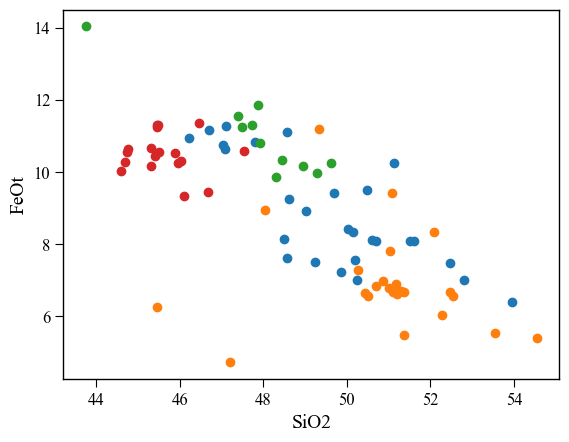

In [41]:
plt.scatter(glasses['SiO2'][alkbas],glasses['FeOt'][alkbas])
plt.scatter(glasses['SiO2'][thol],glasses['FeOt'][thol])
plt.scatter(glasses['SiO2'][trans],glasses['FeOt'][trans])
plt.scatter(glasses['SiO2'][alk],glasses['FeOt'][alk])
plt.xlabel("SiO2")
plt.ylabel("FeOt")

Text(0, 0.5, 'FeOt')

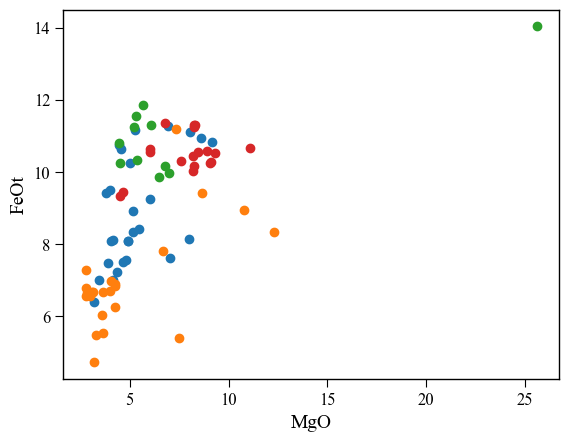

In [42]:
plt.scatter(glasses['MgO'][alkbas],glasses['FeOt'][alkbas])
plt.scatter(glasses['MgO'][thol],glasses['FeOt'][thol])
plt.scatter(glasses['MgO'][trans],glasses['FeOt'][trans])
plt.scatter(glasses['MgO'][alk],glasses['FeOt'][alk])
plt.xlabel("MgO")
plt.ylabel("FeOt")

## import flux curve

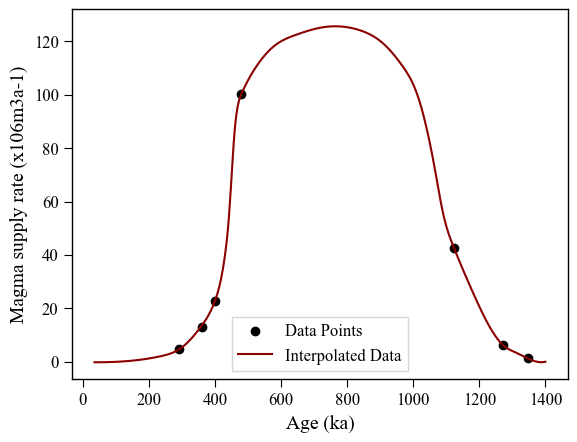

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle

# Load the data
flux = pd.read_csv("fluxhawaii.csv", header=None)
flux = flux.rename(columns={0: "Age (ka)", 1: "Magma supply rate (x106m3a-1)"})
flux = flux.sort_values(by="Age (ka)")

flux_spots = pd.read_csv("fluxhawaii_spots.csv", header=None)
flux_spots = flux_spots.rename(columns={0: "Age (ka)", 1: "Magma supply rate (x106m3a-1)"})
flux_spots = flux_spots.sort_values(by="Age (ka)")

# Interpolating the data
age = flux["Age (ka)"].values
supply_rate = flux["Magma supply rate (x106m3a-1)"].values

# Choose interpolation method: 'linear', 'quadratic', 'cubic', etc.
interpolator = interp1d(age, supply_rate, kind='cubic', fill_value="extrapolate")

# Create a new set of age values for interpolation
new_age = np.linspace(age.min(), age.max(), num=500)  # Adjust 'num' for resolution
new_supply_rate = interpolator(new_age)

# Save the interpolated data
interpolated_data = pd.DataFrame({
    "Age (ka)": new_age,
    "Magma supply rate (x106m3a-1)": new_supply_rate
})

# Save as pickle
with open("interpolated_flux.pkl", "wb") as f:
    pickle.dump(interpolated_data, f)

# Optional: Plotting the original and interpolated data
plt.scatter(flux_spots["Age (ka)"], flux_spots["Magma supply rate (x106m3a-1)"], marker='o', color='k', label='Data Points')
plt.plot(new_age, new_supply_rate, label='Interpolated Data', linestyle='-', color='darkred')
plt.xlabel('Age (ka)')
plt.ylabel('Magma supply rate (x106m3a-1)')
plt.legend()

plt.savefig(figpath+slash+"magma_supply_rate_plot.pdf", format='pdf', dpi=300, transparent=True)
plt.show()



In [182]:
quakes_obs=pd.read_csv("Kam_quakes_caplan.csv",header=None)
quakes_obs=quakes_obs.rename(columns={0: "Latitude (degrees)", 1: "Depth (km)"})
quakes_obs.head()

,Latitude (degrees),Depth (km)
0,18.949072,7.494163
1,18.938992,7.525292
2,18.919894,7.805447
3,18.933156,8.054475
4,18.933687,8.303502


## Plot with all KAM, KIL, and ML

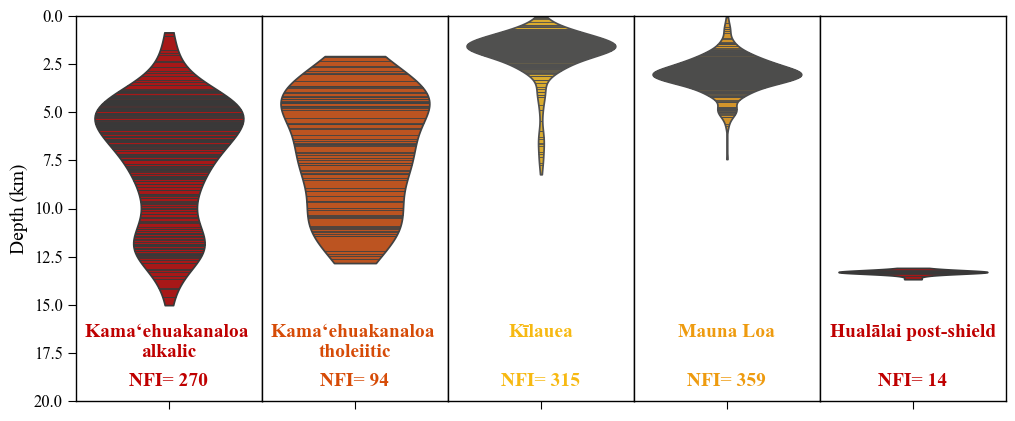

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1, 5, figsize=(12, 5), sharey=True)

bins = np.linspace(0, 20, 19)

ax1_color='#BF0000'
ax2_color='#D64B07'
ax3_color='#F7B912'
ax4_color='#EE9B0F'
ax5_color='#BF0000'

sns.violinplot(data=filtered_data['Depth_km_4step'][alkbas], color=ax1_color,inner='stick',ax=ax1,cut=0)
sns.violinplot(data=filtered_data['Depth_km_4step'][thol], color=ax2_color,inner='stick',ax=ax2,cut=0)
sns.violinplot(data=kil['Depth (km)'], color=ax3_color,inner='stick',ax=ax3,cut=0)
sns.violinplot(data=loa['D(km)_HC'], color=ax4_color,inner='stick',ax=ax4,cut=0)
sns.violinplot(data=hualalai['Depth (km)'], color=ax5_color,inner='stick',ax=ax5,cut=0)


ax1.set_ylabel('Depth (km)')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis

for ax in (ax1, ax2, ax3, ax4, ax5):
    ax.set_ylim([20, 0])  # Set y-axis limits
    if ax in (ax2,ax3,ax4,ax5):      
        ax.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels


ax1.annotate(
    "Kamaʻehuakanaloa \nalkalic",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax1_color,
    fontweight='bold'
)

ax2.annotate(
    "Kamaʻehuakanaloa \ntholeiitic",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax2_color,
    fontweight='bold'
)

ax3.annotate(
    "Kīlauea",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax3_color,
    fontweight='bold'
)

ax4.annotate(
    "Mauna Loa",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax4_color,
    fontweight='bold'
)

ax5.annotate(
    "Hualālai post-shield",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax5_color,
    fontweight='bold'
)

ax1.annotate(
    f'NFI= {len(filtered_data[alkbas])}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax1_color,
    fontweight='bold'
)
ax2.annotate(
    f'NFI= {len(filtered_data[thol])}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax2_color,
    fontweight='bold'
)

ax3.annotate(
    f'NFI= {len(kil)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax3_color,
    fontweight='bold'
)

ax4.annotate(
    f'NFI= {len(loa)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax4_color,
    fontweight='bold'
)

ax5.annotate(
    f'NFI= {len(hualalai)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax5_color,
    fontweight='bold'
)

plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots

# plt.tight_layout()
fig.savefig(figpath+slash+'ALLKAM_ML_KIL_sep.pdf', format='pdf', dpi=300, transparent=True)


## ALL KAM KIL ML only

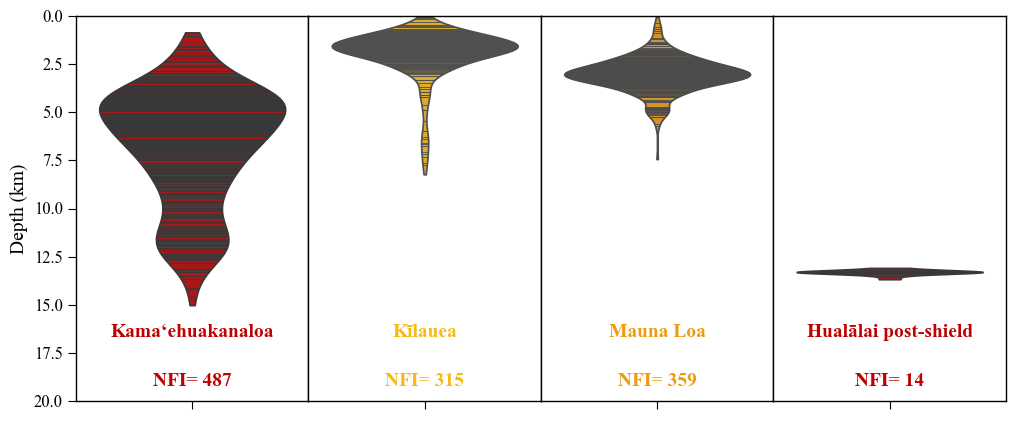

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax3, ax4,ax5) = plt.subplots(1, 4, figsize=(12, 5), sharey=True)

bins = np.linspace(0, 20, 19)

ax1_color='#BF0000'
# ax2_color='#D64B07'
ax3_color='#F7B912'
ax4_color='#EE9B0F'
ax5_color='#BF0000'

sns.violinplot(data=filtered_data['Depth_km_4step'], color=ax1_color,inner='stick',ax=ax1,cut=0)
sns.violinplot(data=kil['Depth (km)'], color=ax3_color,inner='stick',ax=ax3,cut=0)
sns.violinplot(data=loa['D(km)_HC'], color=ax4_color,inner='stick',ax=ax4,cut=0)
sns.violinplot(data=hualalai['Depth (km)'], color=ax5_color,inner='stick',ax=ax5,cut=0)


ax1.set_ylabel('Depth (km)')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis

for ax in (ax1, ax2, ax3, ax4, ax5):
    ax.set_ylim([20, 0])  # Set y-axis limits
    if ax in (ax2,ax3,ax4,ax5):      
        ax.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels


ax1.annotate(
    "Kamaʻehuakanaloa",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax1_color,
    fontweight='bold'
)

ax3.annotate(
    "Kīlauea",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax3_color,
    fontweight='bold'
)

ax4.annotate(
    "Mauna Loa",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax4_color,
    fontweight='bold'
)
ax5.annotate(
    "Hualālai post-shield",
    xy=(0.5, 0.20),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='top',
    color=ax5_color,
    fontweight='bold'
)

ax1.annotate(
    f'NFI= {len(filtered_data)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax1_color,
    fontweight='bold'
)

ax3.annotate(
    f'NFI= {len(kil)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax3_color,
    fontweight='bold'
)

ax4.annotate(
    f'NFI= {len(loa)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax4_color,
    fontweight='bold'
)
ax5.annotate(
    f'NFI= {len(hualalai)}',
    xy=(0.5, 0.05),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color=ax5_color,
    fontweight='bold'
)
plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots

# plt.tight_layout()
fig.savefig(figpath+slash+'ALLKAM_ML_KIL.pdf', format='pdf', dpi=300, transparent=True)


In [185]:
filtered_data[filtered_data['CO2_dens_gcm3_input'].between(0.3,0.5)]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O,P_MPa_minus10,Depth_km_4step
0,L87-1-101-reg3-FIB-r1,0.316046,0.004244,0.003451,0.002351,103.521075,0.008078,0.000426,0.008083,6.042333,...,0.316046,0.004244,None,5.0,three-step,DZ06,0.0,0.05,108.011698,5.154855
1,L87-1-101-reg3-FIA-r1,0.391411,0.003058,0.001959,0.002348,103.694804,0.004443,0.000414,0.004433,6.029333,...,0.391411,0.003058,None,5.0,three-step,DZ06,0.0,0.05,147.958186,6.691466
2,L87-1-101-reg3-FIC-r1,0.372505,0.004394,0.003713,0.002348,103.651742,0.008492,0.000440,0.008500,6.046333,...,0.372505,0.004394,None,5.0,three-step,DZ06,0.0,0.05,137.322313,6.282339
3,L87-1-101-reg2-FIC-r1,0.343428,0.003323,0.002349,0.002349,103.584834,0.005439,0.000398,0.005437,6.018000,...,0.343428,0.003323,None,5.0,three-step,DZ06,0.0,0.05,121.634523,5.678881
4,L87-1-101-reg2-FIB-r1,0.381455,0.004245,0.003496,0.002348,103.672145,0.007971,0.000413,0.007977,6.034667,...,0.381455,0.004245,None,5.0,three-step,DZ06,0.0,0.05,142.121617,6.466952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,186-11-120-B,0.370071,0.007972,0.007618,0.002348,103.646181,0.017439,0.000373,0.017470,6.094000,...,0.370071,0.007972,None,5.0,three-step,DZ06,0.0,0.05,137.449568,6.287234
3290,186-11-119-A,0.361264,0.005027,0.004445,0.002349,103.625981,0.010214,0.000371,0.010228,6.048000,...,0.361264,0.005027,None,5.0,three-step,DZ06,0.0,0.05,132.617303,6.101352
3292,186-11-119-C,0.328668,0.012070,0.011839,0.002350,103.550560,0.027579,0.000371,0.027632,6.070000,...,0.328668,0.012070,None,5.0,three-step,DZ06,0.0,0.05,115.503257,5.443031
3293,KA71_c135_a1_FIA,0.398792,0.009054,0.008639,0.002352,103.708442,0.019280,0.000377,0.019316,5.999667,...,0.398792,0.009054,None,5.0,three-step,DZ06,0.0,0.05,153.865370,6.918696


In [187]:
grouped = filtered_data.groupby('Sample_crystal_new_y')

# Separate numeric and non-numeric columns
numeric_cols =filtered_data.select_dtypes(include='number')
non_numeric_cols = filtered_data.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_kamaehu_xtal_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_kamaehu_xtal_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_kamaehu_xtal_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate kamaehu_xtal_averageds and reindex columns to the original order
kamaehu_xtal_averaged = pd.concat([numeric_kamaehu_xtal_averaged_mean, non_numeric_kamaehu_xtal_averaged], axis=1)
kamaehu_xtal_averaged = kamaehu_xtal_averaged.reindex(columns=filtered_data.columns)

# Add standard deviation columns after reindexing
kamaehu_xtal_averaged = pd.concat([kamaehu_xtal_averaged, numeric_kamaehu_xtal_averaged_std.add_suffix('_std')], axis=1)

# Reset index to get a DataFrame
kamaehu_xtal_averaged = kamaehu_xtal_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averagedbyxtal?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averagedbyxtal?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
kamaehu_xtal_averaged = pd.merge(kamaehu_xtal_averaged, row_counts[['Sample_crystal_new_y', 'averagedbyxtal?']], on='Sample_crystal_new_y', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
kamaehu_xtal_averaged['averagedbyxtal?'] = kamaehu_xtal_averaged['averagedbyxtal?'].fillna('No')

kamaehu_xtal_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_xtal_averaged.xlsx")

kamaehu_xtal_averaged

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input_std,error_T_K_std,CO2_dens_gcm3_input_std,error_CO2_dens_gcm3_std,error_crust_dens_kgm3_std,XH2O_input_std,error_XH2O_std,P_MPa_minus10_std,Depth_km_4step_std,averagedbyxtal?
0,186-11-101-A-rep1,0.288637,0.013959,0.013562,0.002353,103.456366,0.031952,0.001206,0.031973,11.974833,...,0.0,0.0,0.021802,0.014910,0.0,0.032589,0.0,6.852459,0.263592,Yes
1,186-11-102-A,0.414420,0.004620,0.003977,0.002350,103.745768,0.008926,0.001270,0.008855,6.083667,...,0.0,0.0,0.052970,0.000144,0.0,0.000000,0.0,33.899446,1.267485,Yes
2,186-11-103-B,0.206210,0.006153,0.005680,0.002366,103.258423,0.013851,0.001251,0.013824,6.077000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,186-11-104-A,0.371218,0.005463,0.004923,0.002349,103.648649,0.011275,0.001242,0.011229,6.074500,...,0.0,0.0,0.025138,0.000917,0.0,0.000000,0.0,13.962599,0.537095,Yes
4,186-11-105-B,0.440073,0.006873,0.006439,0.002351,103.802915,0.014348,0.001239,0.014323,6.069000,...,0.0,0.0,0.064070,0.001854,0.0,0.000000,0.0,42.929621,1.580455,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,L79_17_FIA_12w,0.507242,0.017611,0.017408,0.002356,103.950392,0.037220,0.000933,0.037301,10.021000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
154,L79_18_FIA,0.283667,0.006734,0.006290,0.002354,103.444697,0.014934,0.000990,0.014936,12.099000,...,0.0,0.0,0.014720,0.001586,0.0,0.026482,0.0,3.885049,0.149445,Yes
155,L79_19_FIA,0.272453,0.008938,0.008621,0.002356,103.417387,0.020521,0.000958,0.020549,12.011750,...,0.0,0.0,0.046214,0.000616,0.0,0.061394,0.0,16.296022,0.626854,Yes
156,L79_21_FIA_12w,0.516307,0.012137,0.011901,0.002357,103.970071,0.025459,0.000929,0.025506,8.197500,...,0.0,0.0,0.008887,0.001577,0.0,0.000000,0.0,6.927197,0.243495,Yes


In [188]:
filtered_data = kamaehu_xtal_averaged.copy()

## Create sample filters
alkbas = filtered_data['filename'].str.contains('187-1|L1|L87|KA71')
trans = filtered_data['filename'].str.contains('186-9|L69|KA69')
alk = filtered_data['filename'].str.contains('186-11|L11|KA611')
# thol_1 = filtered_data['filename'].str.contains('187-8|KA78')
thol = filtered_data['filename'].str.contains('187-9|L79|KA79|187-8|KA78')

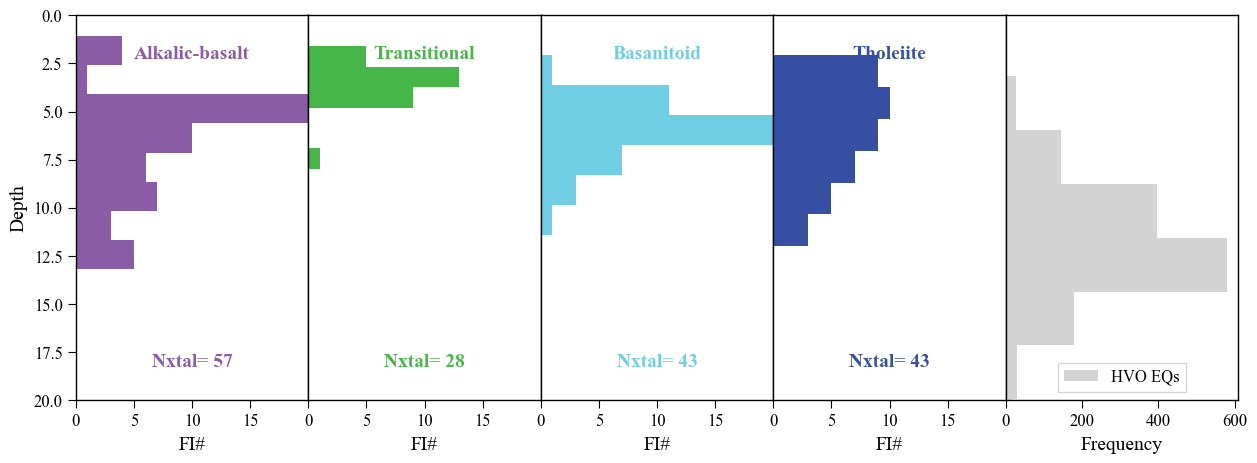

In [189]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Plotting histograms
# ax1.hist(filtered_data['SingleCalc_D_km'][alkbas], ec='k', histtype='step', bins=15, alpha=0.3, label='2 step model', orientation='horizontal')
ax1.hist(filtered_data['Depth_km_4step'][alkbas], ec='none', fc='#8A5CA6', bins=8, alpha=1, label='187-1 alkbas \n(2000mbsl)', orientation='horizontal')
# ax1.legend(loc='lower center')
ax1.set_xlabel('FI#')
ax1.set_ylabel('Depth')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis
ax1.set_ylim([20, 0])  # Set y-axis limits

# ax2.hist(filtered_data['SingleCalc_D_km'][trans], ec='k', histtype='step', bins=8, alpha=0.3, label='2step', orientation='horizontal')
ax2.hist(filtered_data[['Depth_km_4step']][trans], ec='none', fc='#46B649', bins=6, alpha=1, label='186-9 transitional \n(1460 mbsl)', orientation='horizontal')
# ax2.legend(loc='lower center')
ax2.set_xlabel('FI#')
ax2.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax2.set_ylim([20, 0])  # Set y-axis limits

# ax3.hist(filtered_data['SingleCalc_D_km'][alk], ec='k', histtype='step', bins=8, alpha=0.3, label='2step', orientation='horizontal')
ax3.hist(filtered_data['Depth_km_4step'][alk], ec='none', fc='#6FCDE4', bins=6, alpha=1, label='186-11  basanitoid \n(1210 mbsl)', orientation='horizontal')
# ax3.legend(loc='lower center')
ax3.set_xlabel('FI#')
ax3.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax3.set_ylim([20, 0])  # Set y-axis limits

# ax4.hist(filtered_data['SingleCalc_D_km'][thol], histtype='step', edgecolor='black', bins=10, alpha=0.3, label='2step', orientation='horizontal')
ax4.hist(filtered_data['Depth_km_4step'][thol], ec='none', fc='#374FA2', bins=6, alpha=1, label='187-9 thol \n(1080 mbsl)', orientation='horizontal')
# ax4.legend(loc='lower center')
ax4.set_xlabel('FI#')
ax4.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax4.set_ylim([20, 0])  # Set y-axis limits


for ax in (ax1, ax2, ax3, ax4):
    max_limit = 20  # Get the current max limit
    if max_limit == 0:
        continue  # Skip if max limit is 0 to avoid division by zero
    
    # Calculate tick spacing based on max limit
    tick_spacing = max_limit / 4
    
    # Generate ticks
    ticks = np.arange(0, max_limit, tick_spacing)
    
    # Exclude the last tick if it equals the max limit
    if ticks[-1] == max_limit:
        ticks = ticks[:-1]
    
    ax.set_xlim([0, max_limit])  # Set the x-axis limits
    ax.set_xticks(ticks)  # Set the ticks for the x-axis


ax5.hist(eqs['depth'], ec='none', fc='lightgrey', bins=20, label='HVO EQs', orientation='horizontal')
ax5.set_xlabel('Frequency')
ax5.legend(loc='lower center')
ax5.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax5.set_ylim([20, 0])  # Set y-axis limits
ax1.annotate(
    "Alkalic-basalt",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)
ax2.annotate(
    "Transitional",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#46B649',
    fontweight='bold'
)
ax3.annotate(
    "Basanitoid",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#6FCDE4',
    fontweight='bold'
)
ax4.annotate(
    "Tholeiite",
    xy=(0.5, 0.9),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#374FA2',
    fontweight='bold'
)

ax1.annotate(
    f'Nxtal= {len(filtered_data[alkbas])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)
ax2.annotate(
    f'Nxtal= {len(filtered_data[trans])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#46B649',
    fontweight='bold'
)

ax3.annotate(
    f'Nxtal= {len(filtered_data[alk])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#6FCDE4',
    fontweight='bold'
)
ax4.annotate(f'Nxtal= {len(filtered_data[thol])}',
    xy=(0.5, 0.1),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#374FA2',
    fontweight='bold'
)
plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots

# plt.tight_layout()
fig.savefig(figpath+slash+'editable_figure_byxtal.pdf', format='pdf', dpi=300, transparent=True)


In [190]:
filtered_data = kamaehu_PMC[~kamaehu_PMC['filename'].str.contains('FG|MI|FO')]
filtered_data[(filtered_data['filename'].str.contains("186-9|KA69|L69"))&(filtered_data['Depth_km_4step']>4)]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O,P_MPa_minus10,Depth_km_4step
2992,L69_4_FIB_20w,0.443073,0.006725,0.006301,0.002350,103.810616,0.013959,0.002745,0.013720,19.9140,...,0.443073,0.006725,None,5.0,three-step,DZ06,0.000000,0.05,181.304715,7.974197
3054,186-9-208-FIA,0.230915,0.006075,0.005597,0.002361,103.318418,0.013534,0.000843,0.013536,5.9820,...,0.230915,0.006075,None,5.0,three-step,DZ06,0.131558,0.05,83.681802,4.218964
3185,186-9-105--Spectrum--051,0.224404,0.013787,0.013557,0.002362,103.302606,0.032888,0.000922,0.032940,6.0270,...,0.224404,0.013787,None,5.0,three-step,DZ06,0.140618,0.05,81.466795,4.133760
3192,186-9-111-A--Spectrum--128,0.216954,0.010447,0.010149,0.002364,103.284487,0.024619,0.000970,0.024648,6.1285,...,0.216954,0.010447,None,5.0,three-step,DZ06,0.147653,0.05,78.536444,4.021039
3194,186-9-113-A--Spectrum--141,0.223748,0.017306,0.017116,0.002362,103.301064,0.041478,0.000993,0.041549,6.1260,...,0.223748,0.017306,None,5.0,three-step,DZ06,0.141374,0.05,81.224552,4.124442
3202,186-9-117-C--Spectrum--093,0.217553,0.019399,0.019254,0.002363,103.286032,0.046770,0.000494,0.046864,6.0920,...,0.217553,0.019399,None,5.0,three-step,DZ06,0.147207,0.05,78.785557,4.030622


In [ ]:
filtered_data['SingleCalc_P_kbar'][alkbas]

In [196]:
## Create sample filters
alkbas = filtered_data['filename'].str.contains('187-1|L1|L87|KA71')
trans = filtered_data['filename'].str.contains('186-9|L69|KA69')
alk = filtered_data['filename'].str.contains('186-11|L11|KA611')
# thol_1 = filtered_data['filename'].str.contains('187-8|KA78')
thol = filtered_data['filename'].str.contains('187-9|L79|KA79|187-8|KA78')

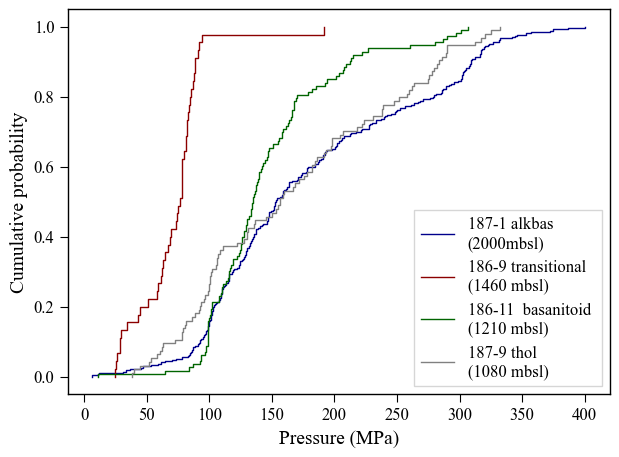

In [197]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))

x1=100*filtered_data['SingleCalc_P_kbar'][alkbas]
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='darkblue', linewidth=1, label='187-1 alkbas \n(2000mbsl)')

x2=100*filtered_data['SingleCalc_P_kbar'][trans]
x2_sorted=np.sort(x2)
ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
         np.arange(x2_sorted.size+1)/x2_sorted.size, color='darkred', linewidth=1, label='186-9 transitional \n(1460 mbsl)')

x3=100*filtered_data['SingleCalc_P_kbar'][alk]
x3_sorted=np.sort(x3)
ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
         np.arange(x3_sorted.size+1)/x3_sorted.size, color='darkgreen', linewidth=1, label='186-11  basanitoid \n(1210 mbsl)')

# x4=100*filtered_data['SingleCalc_P_kbar'][thol_1]
# x4_sorted=np.sort(x4)
# ax1.step(np.concatenate([x4_sorted, x4_sorted[[-1]]]),
#          np.arange(x4_sorted.size+1)/x4_sorted.size, color='orange', linewidth=1, label='187-8 thol \n(1130 mbsl)')

x5=100*filtered_data['SingleCalc_P_kbar'][thol]
x5_sorted=np.sort(x5)
ax1.step(np.concatenate([x5_sorted, x5_sorted[[-1]]]),
         np.arange(x5_sorted.size+1)/x5_sorted.size, color='grey', linewidth=1, label='187-9 thol \n(1080 mbsl)')


plt.legend()
ax1.set_xlabel("Pressure (MPa)")
ax1.set_ylabel("Cumulative probability")
# plt.tight_layout()
fig.savefig(figpath+slash+'cdf_samples.pdf', format='pdf', dpi=300, transparent=True)

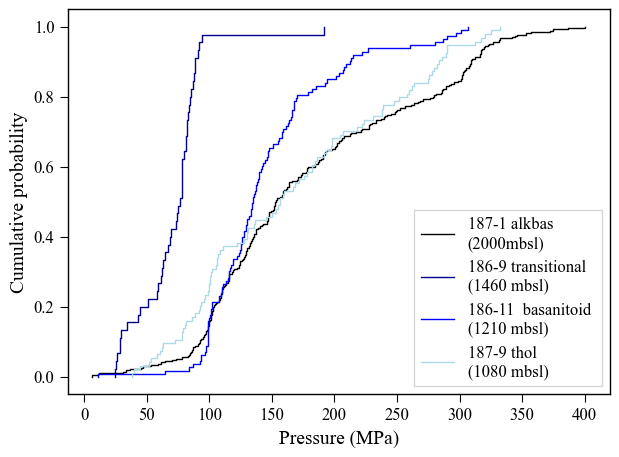

In [199]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))

x1=100*filtered_data['SingleCalc_P_kbar'][alkbas]
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='k', linewidth=1, label='187-1 alkbas \n(2000mbsl)')

x2=100*filtered_data['SingleCalc_P_kbar'][trans]
x2_sorted=np.sort(x2)
ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
         np.arange(x2_sorted.size+1)/x2_sorted.size, color='darkblue', linewidth=1, label='186-9 transitional \n(1460 mbsl)')

x3=100*filtered_data['SingleCalc_P_kbar'][alk]
x3_sorted=np.sort(x3)
ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
         np.arange(x3_sorted.size+1)/x3_sorted.size, color='blue', linewidth=1, label='186-11  basanitoid \n(1210 mbsl)')

# x4=100*filtered_data['SingleCalc_P_kbar'][thol_1]
# x4_sorted=np.sort(x4)
# ax1.step(np.concatenate([x4_sorted, x4_sorted[[-1]]]),
#          np.arange(x4_sorted.size+1)/x4_sorted.size, color='skyblue', linewidth=1, label='187-8 thol \n(1130 mbsl)')

x5=100*filtered_data['SingleCalc_P_kbar'][thol]
x5_sorted=np.sort(x5)
ax1.step(np.concatenate([x5_sorted, x5_sorted[[-1]]]),
         np.arange(x5_sorted.size+1)/x5_sorted.size, color='lightblue', linewidth=1, label='187-9 thol \n(1080 mbsl)')


plt.legend()
ax1.set_xlabel("Pressure (MPa)")
ax1.set_ylabel("Cumulative probability")
# plt.tight_layout()
fig.savefig(figpath+slash+'cdf_bluescale.pdf', format='pdf', dpi=300, transparent=True)

## Now plot Depth vs Fo

In [200]:
filtered_data.to_clipboard(excel=True)

filtered_data = kamaehu_xtal_averaged.copy()

## Create sample filters
alkbas = filtered_data['filename'].str.contains('187-1|L1|KA71')
trans = filtered_data['filename'].str.contains('186-9|L69|KA69')
alk = filtered_data['filename'].str.contains('186-11|L11|KA611')
# thol_1 = filtered_data['filename'].str.contains('187-8|KA78')
thol = filtered_data['filename'].str.contains('187-9|L79|KA79|187-8|KA78')

In [207]:
filtered_data[trans]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input_std,error_T_K_std,CO2_dens_gcm3_input_std,error_CO2_dens_gcm3_std,error_crust_dens_kgm3_std,XH2O_input_std,error_XH2O_std,P_MPa_minus10_std,Depth_km_4step_std,averagedbyxtal?
43,186-9-101-A--Spectrum--142,0.151517,0.004546,0.002327,0.003905,103.132643,0.005873,0.000517,0.005862,6.085000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
44,186-9-102-B--Spectrum--157,0.112923,0.004991,0.003554,0.003329,103.031295,0.008885,0.000525,0.008884,6.082000,...,0.0,0.0,0.076658,0.001554,0.0,0.051447,0.0,31.080985,1.195583,Yes
45,186-9-103-A-rep1,0.173257,0.004511,0.003247,0.002900,103.180785,0.008034,0.001438,0.007905,6.001333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
46,186-9-104-A,0.194764,0.030069,0.029975,0.002368,103.230462,0.073353,0.001454,0.073489,6.003000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
47,186-9-105--Spectrum--051,0.224404,0.013787,0.013557,0.002362,103.302606,0.032888,0.000922,0.032940,6.027000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
48,186-9-106--Spectrum--059,0.205643,0.004809,0.004185,0.002366,103.257038,0.010207,0.000918,0.010186,6.063667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
49,186-9-107--Spectrum--081,0.201228,0.016444,0.016265,0.002367,103.246114,0.039680,0.000924,0.039749,6.116200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
50,186-9-108-B--Spectrum--099,0.200131,0.011374,0.011111,0.002367,103.243564,0.027146,0.000936,0.027184,6.120833,...,0.0,0.0,0.004592,0.002922,0.0,0.000361,0.0,2.190950,0.084279,Yes
51,186-9-109--Spectrum--112,0.109537,0.009916,0.008707,0.003814,103.026697,0.021973,0.000946,0.021982,6.125333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
52,186-9-110--Spectrum--120,0.165164,0.006130,0.004686,0.003953,103.167083,0.011826,0.000952,0.011812,6.129000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


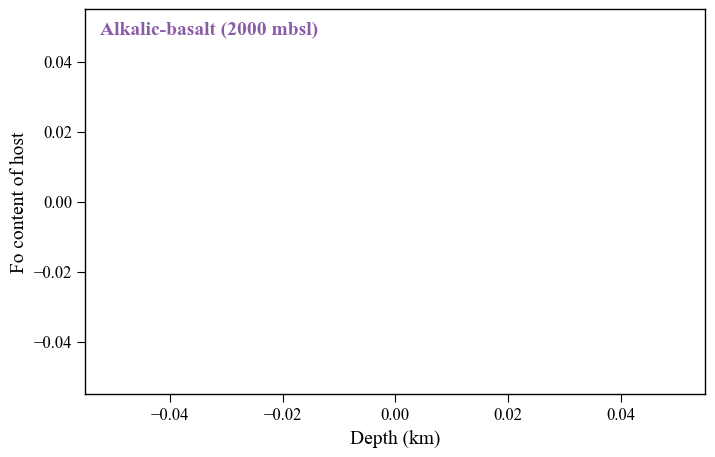

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))


# ax1.errorbar(filtered_data['Fo'][alkbas]*100, filtered_data['SingleCalc_D_km'][alkbas], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][alkbas],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkblue', ms=5, mec='k', capsize=3, label='187-1 alkbas \n(2000mbsl)',zorder=0)
ax1.scatter( filtered_data['Depth_km_4step'][alkbas], filtered_data['Fo'][alkbas]*100,
             marker='d',   facecolor='#8A5CA6', edgecolor='k', label='4 step depth model',zorder=1)
ax1.scatter( filtered_data['Depth_km_4step'][trans], filtered_data['Fo'][trans]*100,
             marker='d',   facecolor='darkred', edgecolor='k', label='4 step depth model',zorder=1)
ax1.scatter( filtered_data['Depth_km_4step'][alk], filtered_data['Fo'][alk]*100,
             marker='d',   facecolor='darkgreen', edgecolor='k', label='4 step depth model',zorder=1)
ax1.scatter( filtered_data['Depth_km_4step'][thol], filtered_data['Fo'][thol]*100,
             marker='d',   facecolor='grey', edgecolor='k', label='4 step depth model',zorder=1)


# ax1.errorbar(filtered_data['Fo'][trans], filtered_data['SingleCalc_D_km'][trans], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][trans],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkred', ms=5, mec='k', capsize=3, label='186-9 transitional \n(1460 mbsl)')
# ax1.errorbar(filtered_data['Fo'][alk], filtered_data['SingleCalc_D_km'][alk], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][alk],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkgreen', ms=5, mec='k', capsize=3, label='186-11  basanitoid \n(1210 mbsl)')
# # ax1.errorbar(filtered_data['Fo'][thol_1], filtered_data['SingleCalc_D_km'][thol_1], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][thol_1],
# #              fmt='d', ecolor='grey', elinewidth=0.8, mfc='orange', ms=5, mec='k', capsize=3, label='187-8 thol \n(1130 mbsl)')
# ax1.errorbar(filtered_data['Fo'][thol], filtered_data['SingleCalc_D_km'][thol], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][thol],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='grey', ms=5, mec='k', capsize=3, label='187-9 thol \n(1080 mbsl)')

ax1.annotate(
    "Alkalic-basalt (2000 mbsl)",
    xy=(0.2, 0.95),  # Coordinates as fractions of the axes
    xycoords='axes fraction',  # Use 'axes fraction' for relative positioning
    fontsize=14,
    ha='center',
    va='center',
    color='#8A5CA6',
    fontweight='bold'
)
ax1.set_ylabel('Fo content of host')
ax1.set_xlabel('Depth (km)')
# ax1.set_ylim([80,95])
# plt.legend()#

# plt.tight_layout()
fig.savefig(figpath+slash+'FovsDepth.pdf', format='pdf', dpi=300, transparent=True)